<a href="https://www.kaggle.com/code/kareemibrahim27/lithology-classification-xceed?scriptVersionId=120332294" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Main libraries

In [64]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
"!pip install ppscore"
"!pip install fancyimpute"
from sklearn.experimental import enable_iterative_imputer
from fancyimpute import IterativeImputer
"import ppscore as pps"
import warnings
warnings.filterwarnings('ignore')

## Reading Data 

In [65]:
data= pd.read_csv('/kaggle/input/lithology-classification/xeek_train_subset.csv')
data.head()

WELL    DEPTH_MD        X_LOC      Y_LOC       Z_LOC         GROUP  \
0  15/9-13  415.261599  437641.9688  6470972.5 -469.501831  NORDLAND GP.   
1  15/9-13  415.413599  437641.9688  6470972.5 -469.653809  NORDLAND GP.   
2  15/9-13  415.565599  437641.9688  6470972.5 -469.805786  NORDLAND GP.   
3  15/9-13  415.717599  437641.9688  6470972.5 -469.957794  NORDLAND GP.   
4  15/9-13  415.869599  437641.9688  6470972.5 -470.109772  NORDLAND GP.   

  FORMATION       CALI  RSHA      RMED  ...        ROP  DTS  DCAL      DRHO  \
0       NaN  19.480835   NaN  1.611410  ...  34.636410  NaN   NaN -0.574928   
1       NaN  19.468800   NaN  1.618070  ...  34.636410  NaN   NaN -0.570188   
2       NaN  19.468800   NaN  1.626459  ...  34.779556  NaN   NaN -0.574245   
3       NaN  19.459282   NaN  1.621594  ...  39.965164  NaN   NaN -0.586315   
4       NaN  19.453100   NaN  1.602679  ...  57.483765  NaN   NaN -0.597914   

   MUDWEIGHT  RMIC  ROPA  RXO  FORCE_2020_LITHOFACIES_LITHOLOGY  \
0        NaN   NaN   NaN  NaN                             65000   
1        NaN   NaN   NaN  NaN                             65000   
2        NaN   NaN   NaN  NaN                             65000   
3        NaN   NaN   NaN  NaN                             65000   
4        NaN   NaN   NaN  NaN                             65000   

   FORCE_2020_LITHOFACIES_CONFIDENCE  
0                                1.0  
1                                1.0  
2                                1.0  
3                                1.0  
4                                1.0  

[5 rows x 29 columns]

In [66]:
df=pd.DataFrame(data)


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               133198 non-null  object 
 1   DEPTH_MD                           133198 non-null  float64
 2   X_LOC                              125805 non-null  float64
 3   Y_LOC                              125805 non-null  float64
 4   Z_LOC                              125805 non-null  float64
 5   GROUP                              133198 non-null  object 
 6   FORMATION                          111632 non-null  object 
 7   CALI                               133006 non-null  float64
 8   RSHA                               62039 non-null   float64
 9   RMED                               125556 non-null  float64
 10  RDEP                               125805 non-null  float64
 11  RHOB                               1080

In [68]:
"""import sys

!"{sys.executable}" -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

import pandas as pd
import pandas_profiling as pp

profile= pp.ProfileReport(df, title= ' Data Profiling Report')
profile.to_widgets()"""

'import sys\n\n!"{sys.executable}" -m pip install -U pandas-profiling[notebook]\n!jupyter nbextension enable --py widgetsnbextension\n\nimport pandas as pd\nimport pandas_profiling as pp\n\nprofile= pp.ProfileReport(df, title= \' Data Profiling Report\')\nprofile.to_widgets()'

# EDA

In [69]:
df.describe().T

count          mean           std  \
DEPTH_MD                           133198.0  1.792945e+03    739.441515   
X_LOC                              125805.0  4.512356e+05  15299.395264   
Y_LOC                              125805.0  6.471392e+06  30944.486918   
Z_LOC                              125805.0 -1.719215e+03    740.536678   
CALI                               133006.0  1.319940e+01      3.561386   
RSHA                                62039.0  1.056183e+01    116.359983   
RMED                               125556.0  1.708851e+00      9.127200   
RDEP                               125805.0  1.743774e+00     13.233330   
RHOB                               108053.0  2.199556e+00      0.236902   
GR                                 133198.0  6.955387e+01     39.328728   
SGR                                 17350.0  5.981314e+01     25.538669   
NPHI                                91725.0  3.556019e-01      0.143857   
PEF                                100840.0  4.511845e+00      5.092807   
DTC                                132635.0  1.227003e+02     34.234879   
SP                                  93680.0  9.160892e+01     98.781404   
BS                                  97529.0  1.219454e+01      3.143410   
ROP                                130454.0  2.816382e+01     45.592228   
DTS                                 12184.0  1.765837e+02     44.358622   
DCAL                                56200.0  9.721649e-01     43.000304   
DRHO                               105539.0  9.306930e-03      0.067312   
MUDWEIGHT                          101644.0  2.291368e+00     17.882420   
RMIC                                 1635.0  2.568148e+00      2.261201   
ROPA                                13473.0  2.525384e+01     14.319902   
RXO                                 38946.0 -1.129442e+02    333.547482   
FORCE_2020_LITHOFACIES_LITHOLOGY   133198.0  6.326158e+04  13623.352961   
FORCE_2020_LITHOFACIES_CONFIDENCE  133183.0  1.235796e+00      0.480781   

                                            min           25%           50%  \
DEPTH_MD                           4.152616e+02  1.182822e+03  1.747524e+03   
X_LOC                              4.367908e+05  4.376408e+05  4.441521e+05   
Y_LOC                              6.429286e+06  6.453743e+06  6.463019e+06   
Z_LOC                             -3.246156e+03 -2.334162e+03 -1.626893e+03   
CALI                               5.946157e+00  1.138185e+01  1.269857e+01   
RSHA                               1.301926e-01  7.592273e-01  9.975146e-01   
RMED                              -8.418695e-03  7.797626e-01  1.095681e+00   
RDEP                               1.230677e-01  7.773233e-01  1.130621e+00   
RHOB                               1.366913e+00  2.029237e+00  2.162121e+00   
GR                                 1.092843e-01  4.324464e+01  6.626613e+01   
SGR                               -1.968700e+02  4.128114e+01  6.297361e+01   
NPHI                              -2.314329e-02  2.349273e-01  3.820143e-01   
PEF                                1.010027e+00  2.857540e+00  3.780121e+00   
DTC                                7.415132e+00  8.789978e+01  1.359681e+02   
SP                                -2.199269e+00  4.880824e+01  7.028276e+01   
BS                                 8.500000e+00  8.500000e+00  1.225000e+01   
ROP                                1.883194e-02  9.650485e+00  2.236236e+01   
DTS                                9.306826e+01  1.497540e+02  1.625379e+02   
DCAL                              -1.221546e+01  7.800102e-03  4.154194e-01   
DRHO                              -1.795894e+00 -7.736300e-03  3.215067e-03   
MUDWEIGHT                          1.258177e-01  1.378004e-01  1.521795e-01   
RMIC                               3.622254e-01  1.387308e+00  2.133351e+00   
ROPA                               5.561134e-01  1.426023e+01  2.459874e+01   
RXO                               -9.999000e+02  5.373284e-01  8.794549e-01   
FORCE_2020_LITHOFACIES_LITHOLOGY   3.

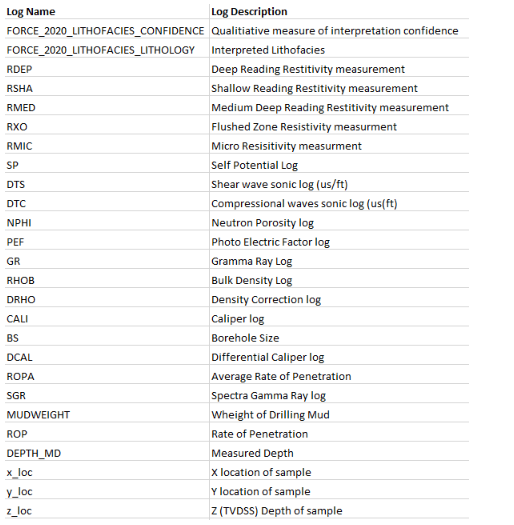
https://xeek.ai/challenges/force-well-logs

In [70]:
corr=df.corr()
corr

DEPTH_MD     X_LOC     Y_LOC     Z_LOC  \
DEPTH_MD                           1.000000  0.911678  0.467225  0.071676   
X_LOC                              0.911678  1.000000  0.423425  0.260806   
Y_LOC                              0.467225  0.423425  1.000000  0.121413   
Z_LOC                              0.071676  0.260806  0.121413  1.000000   
CALI                              -0.369220 -0.199424 -0.192544  0.691455   
RSHA                               0.137714  0.077886 -0.008780 -0.027533   
RMED                               0.018519 -0.000893  0.027837 -0.079354   
RDEP                               0.013090  0.004320  0.016460 -0.036918   
RHOB                               0.275450  0.133245 -0.113310 -0.699528   
GR                                 0.085538  0.187844  0.012750  0.179629   
SGR                                0.106342  0.040525 -0.030445 -0.107413   
NPHI                              -0.173504 -0.043194  0.177327  0.631672   
PEF                                0.054297 -0.005367 -0.109530 -0.139899   
DTC                               -0.158296  0.085472 -0.048923  0.792722   
SP                                 0.252685  0.295473 -0.155282  0.098806   
BS                                -0.306672 -0.132232 -0.239638  0.746950   
ROP                               -0.025554 -0.038399  0.139423  0.082086   
DTS                                0.366568  0.375271  0.384774  0.339044   
DCAL                              -0.010676 -0.006666  0.017242 -0.007657   
DRHO                              -0.061099 -0.064394  0.014864 -0.076365   
MUDWEIGHT                          0.069337 -0.012464 -0.095473 -0.162798   
RMIC                               0.278777  0.277942  0.279244 -0.278706   
ROPA                               0.086719  0.181856  0.183543  0.397012   
RXO                                0.480535  0.252676  0.039199 -0.461944   
FORCE_2020_LITHOFACIES_LITHOLOGY   0.135844  0.089920 -0.055847 -0.010354   
FORCE_2020_LITHOFACIES_CONFIDENCE  0.181505  0.084021 -0.089119 -0.168498   

                                       CALI      RSHA      RMED      RDEP  \
DEPTH_MD                          -0.369220  0.137714  0.018519  0.013090   
X_LOC                             -0.199424  0.077886 -0.000893  0.004320   
Y_LOC                             -0.192544 -0.008780  0.027837  0.016460   
Z_LOC                              0.691455 -0.027533 -0.079354 -0.036918   
CALI                               1.000000 -0.004708 -0.077822 -0.031430   
RSHA                              -0.004708  1.000000  0.065596  0.042289   
RMED                              -0.077822  0.065596  1.000000  0.441541   
RDEP                              -0.031430  0.042289  0.441541  1.000000   
RHOB                              -0.657680  0.137810  0.102299  0.055256   
GR                                 0.045103 -0.131051 -0.045671 -0.028622   
SGR                               -0.242609 -0.423207 -0.218477 -0.206159   
NPHI                               0.517797 -0.201900 -0.132177 -0.081059   
PEF                               -0.110455  0.086131  0.009494  0.028922   
DTC                                0.577227 -0.145757 -0.115470 -0.074464   
SP                                 0.151686 -0.025179 -0.004556  0.001980   
BS                                 0.881303 -0.020773 -0.060299 -0.030534   
ROP                                0.091370 -0.023423 -0.011614 -0.011273   
DTS                                0.183289 -0.393618 -0.072991 -0.058367   
DCAL                               0.329469 -0.004043 -0.001360  0.001105   
DRHO                               0.006120 -0.021250 -0.012018 -0.011328   
MUDWEIGHT                         -0.104453  0.271974  0.002985 -0.004109   
RMIC                              -0.277645       NaN  0.093811  0.010799   
ROPA                               0.192188 -0.382209 -0.025961  0.013196   
RXO                               -0.369874  0.099756  0.099865  0.058267   
FORCE_2020_LITHOFACIES_LITHOLO

<AxesSubplot:>

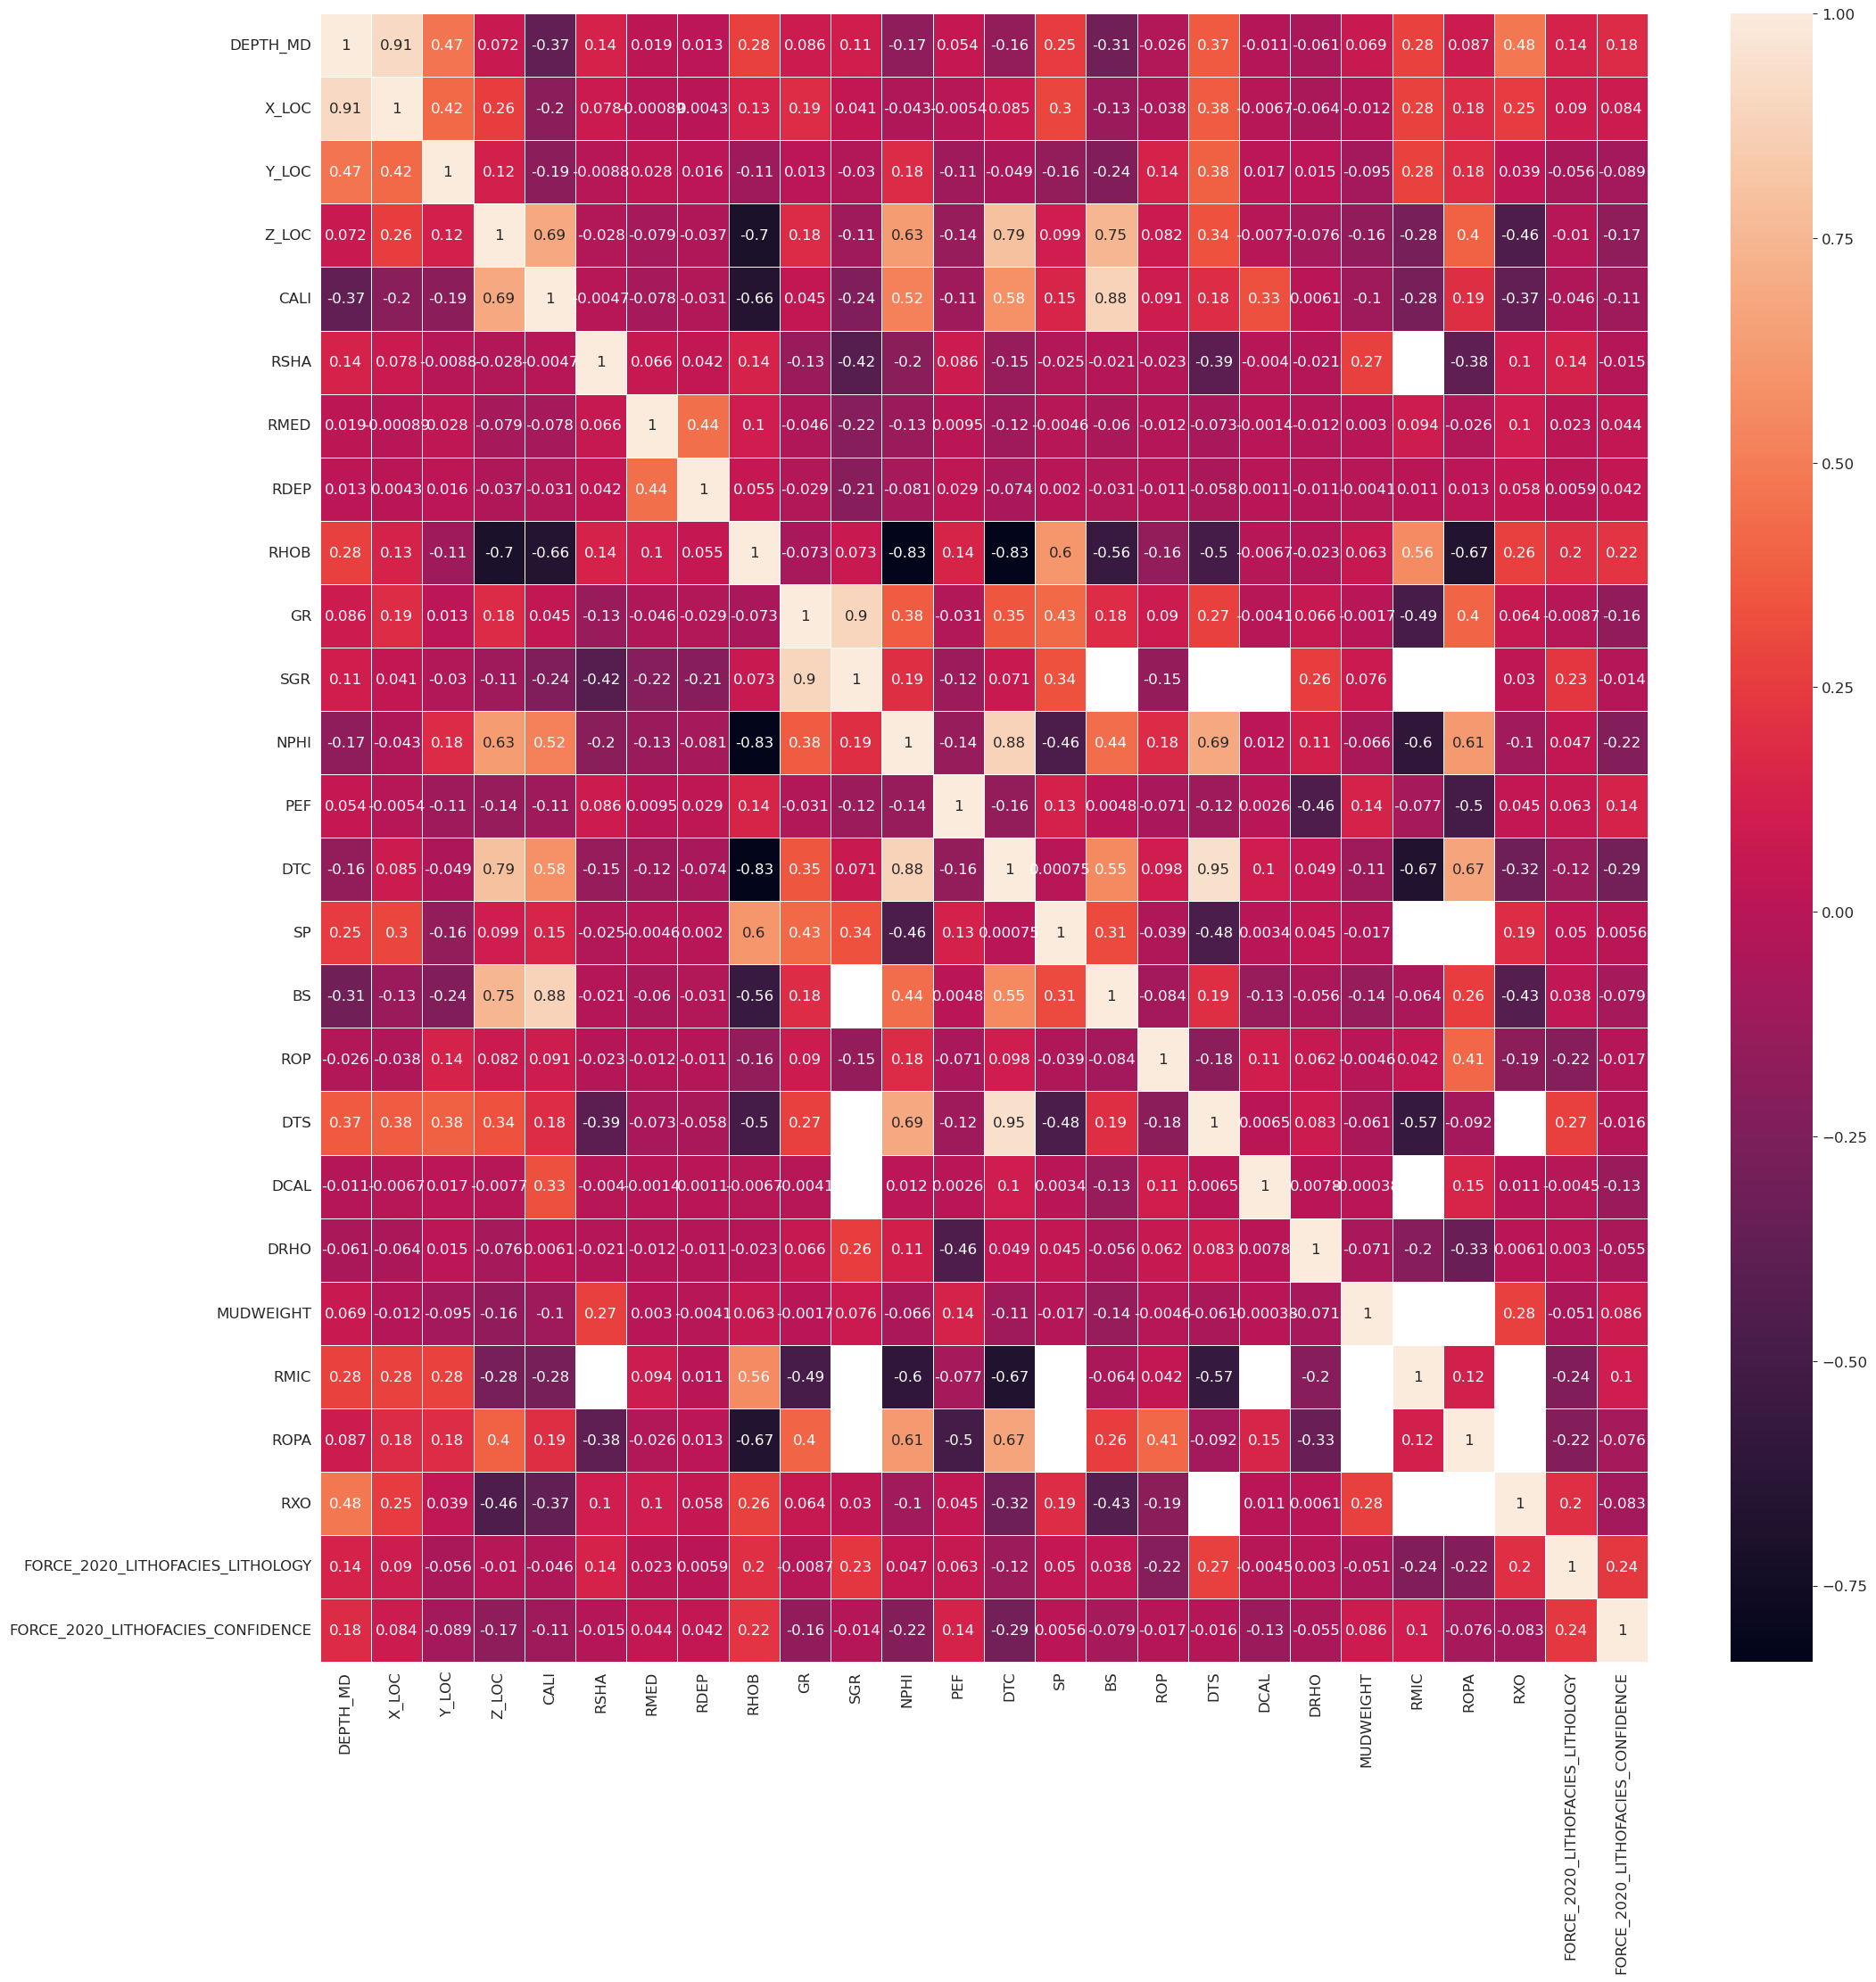

In [71]:
#for linear correlation 
plt.figure(figsize=(24,24))
#p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn')  
sns.heatmap(corr, annot = True, linewidths=0.5)

In [72]:
!pip install ppscore

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


<AxesSubplot:xlabel='x', ylabel='y'>

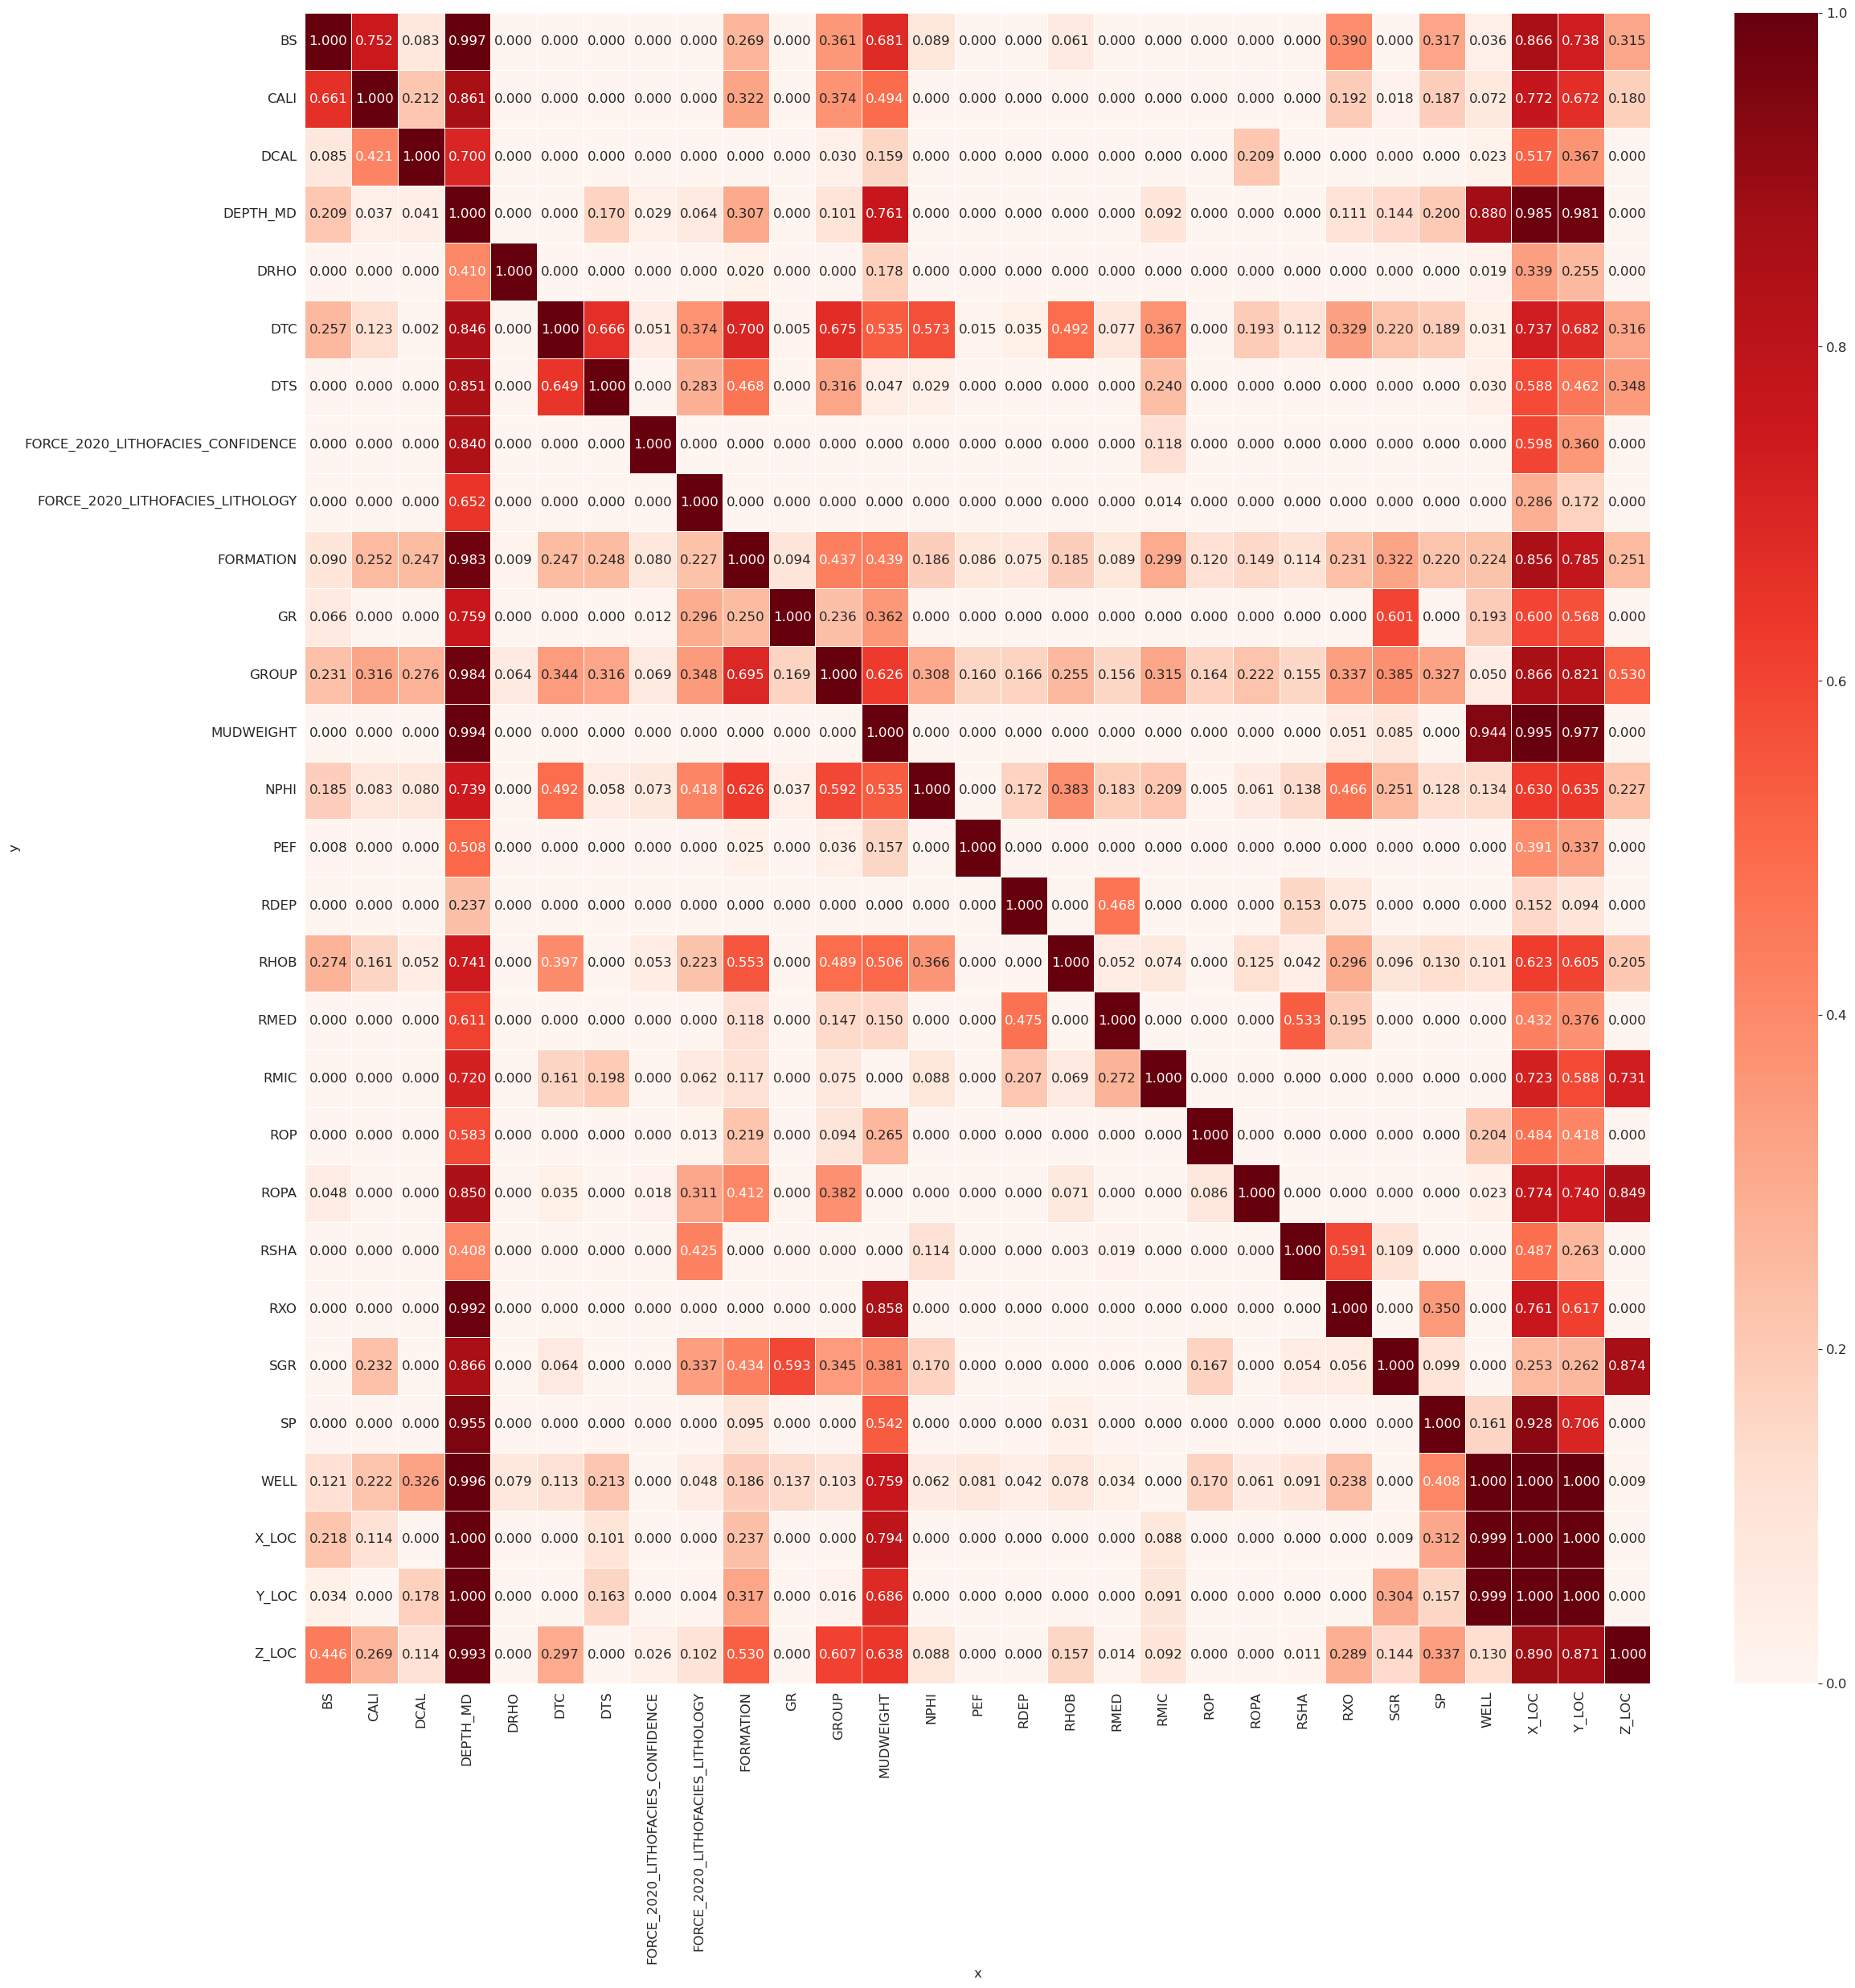

In [73]:
#for non linear correlation
plt.figure(figsize=(27,27))
plt.rcParams.update({'font.size': 12})
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Reds", linewidths=0.5, annot=True,fmt=".3f")

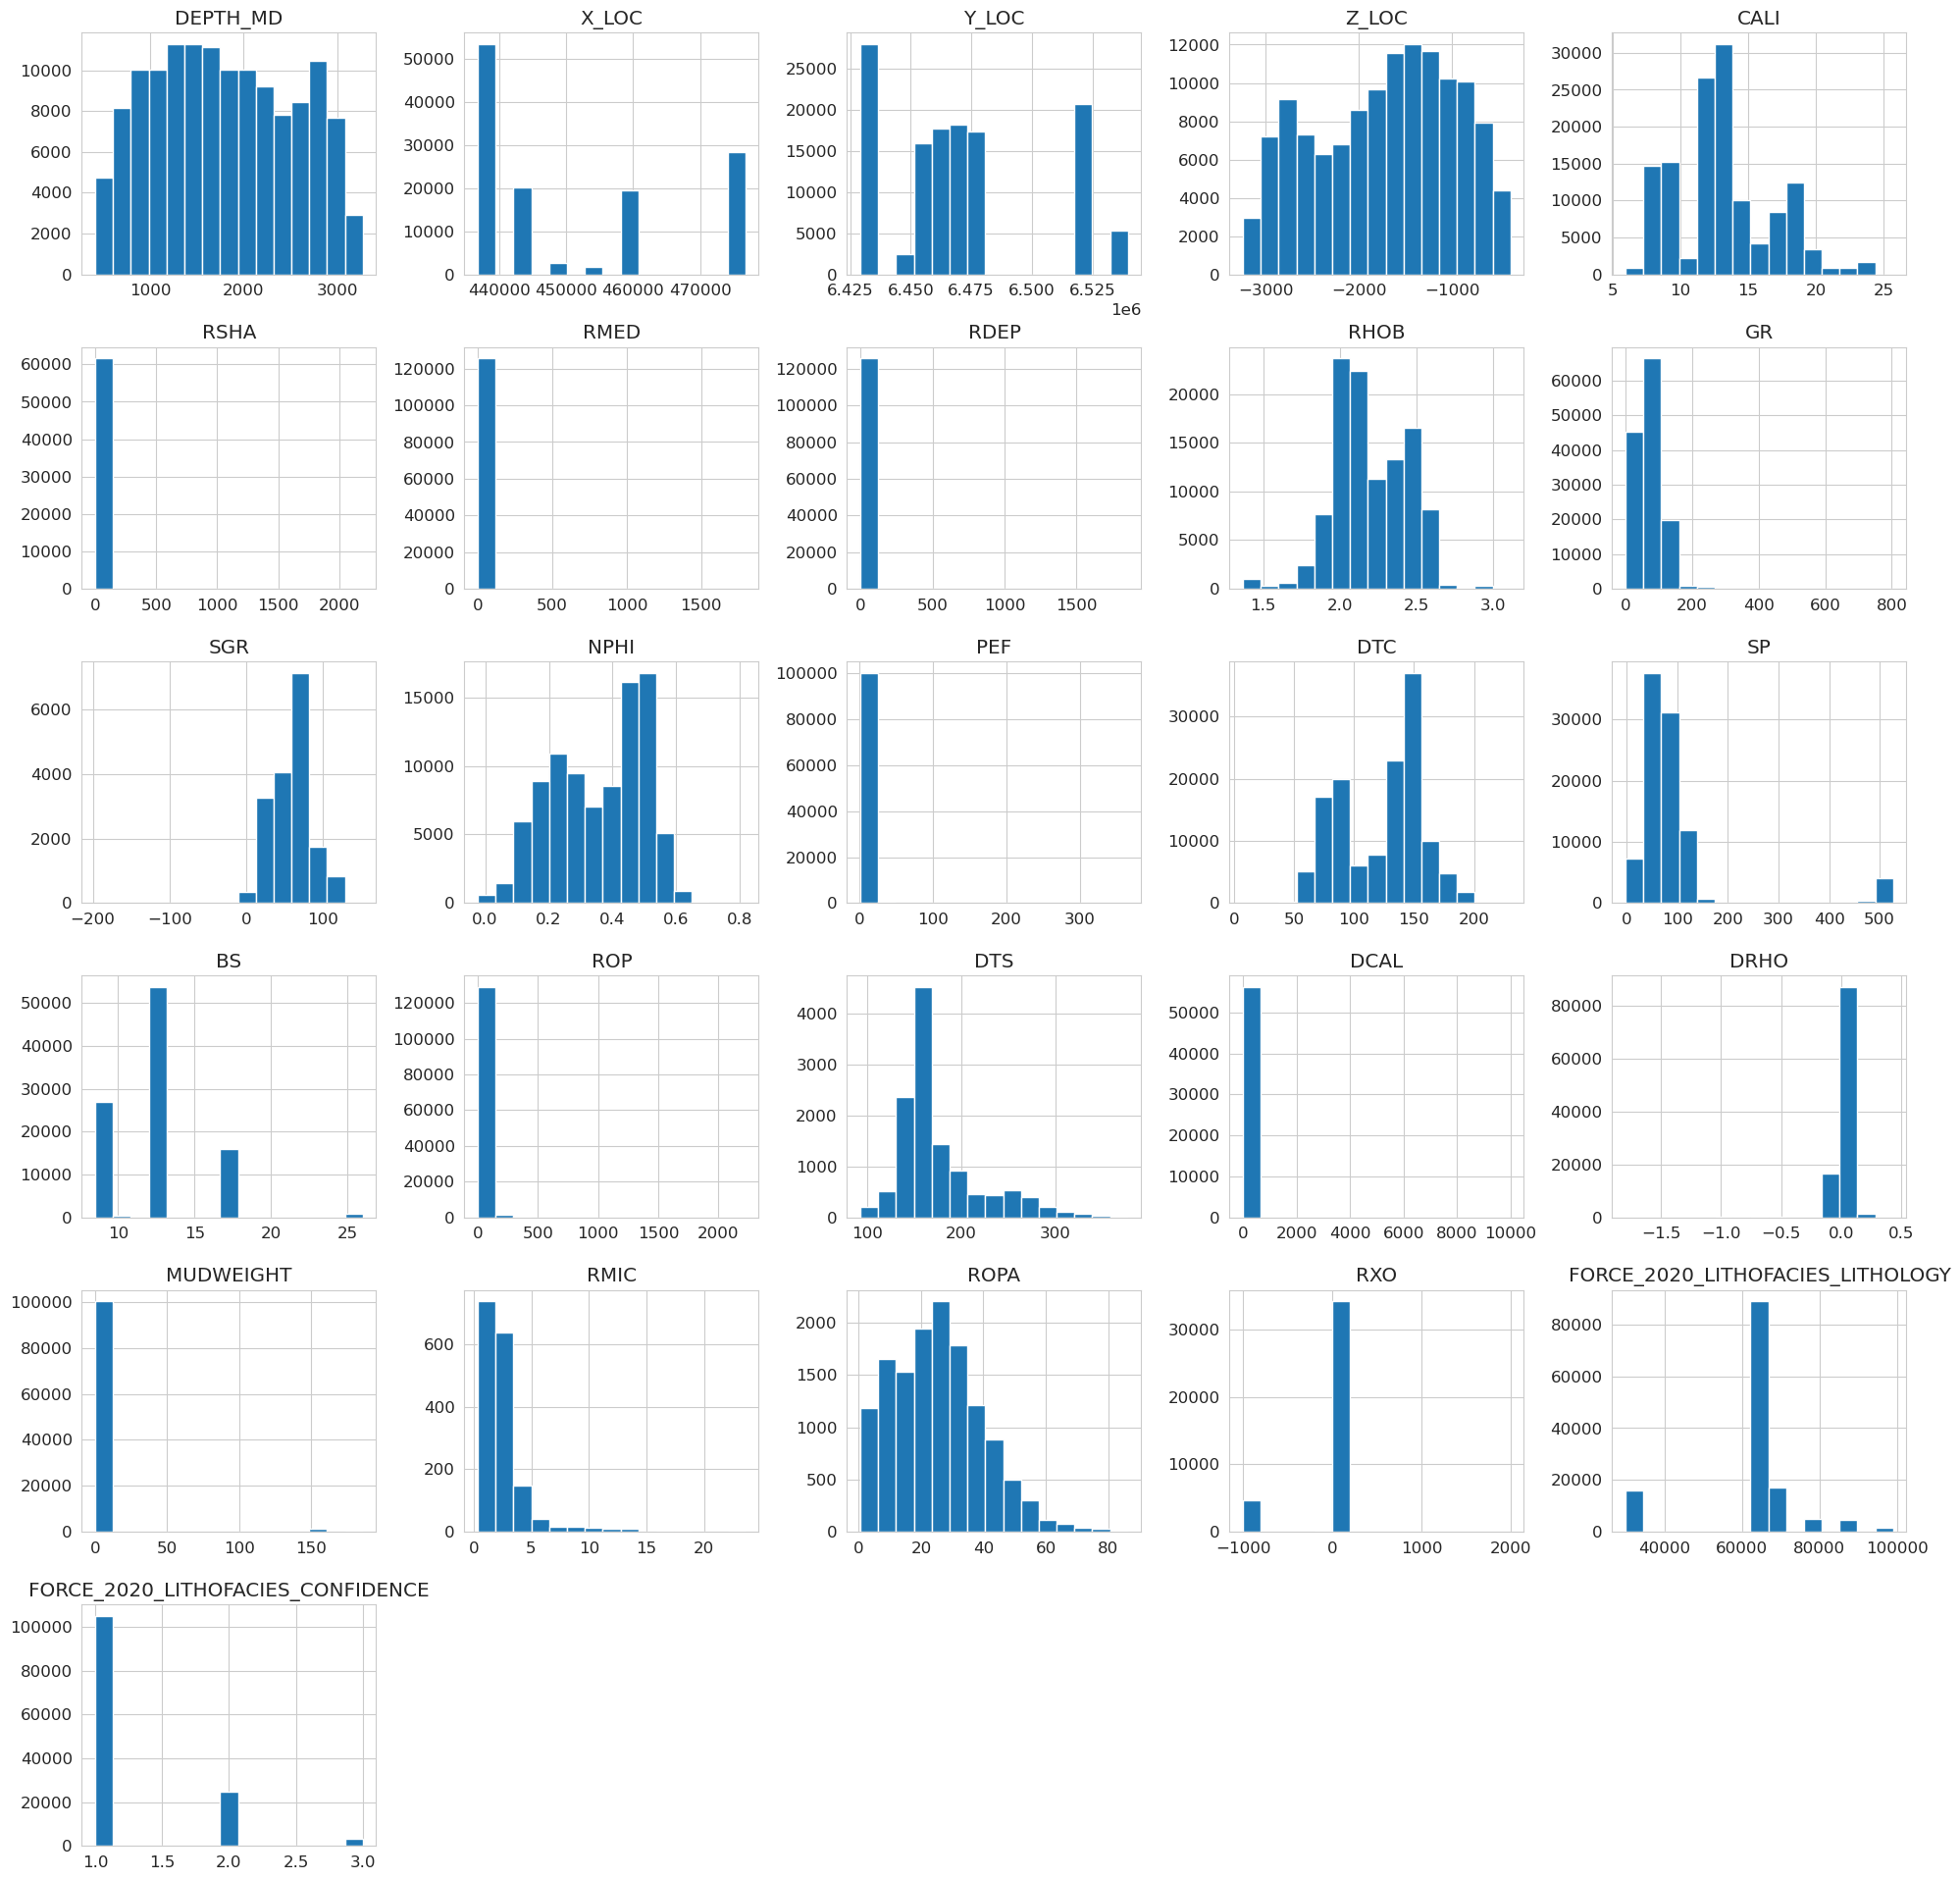

In [74]:
df.hist(bins = 15 , figsize = (24,24))
plt.show()

In [75]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

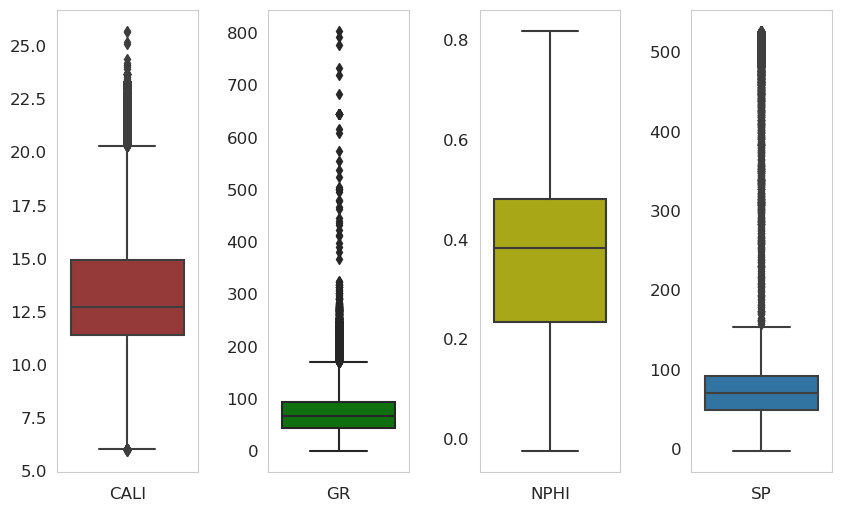

In [76]:
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(10, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 

# draw boxplot for age in the 1st subplot
sns.boxplot(data=df['CALI'], ax=ax[0], color='brown',)
ax[0].set_xlabel('CALI')

# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=df['GR'], ax=ax[1], color='g')
ax[1].set_xlabel('GR')

# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=df['NPHI'], ax=ax[2], color='y')
ax[2].set_xlabel('NPHI')

# finally draw boxplot for unit_price in the 4th subplot
sns.boxplot(data=df['SP'], ax=ax[3])
ax[3].set_xlabel('SP')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

In [77]:
df['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/10-1', '16/10-2', '16/10-3',
       '16/10-5', '16/11-1 ST3', '16/1-2', '16/1-6 A', '16/2-11 A',
       '16/2-16'], dtype=object)

In [78]:
df['WELL'].nunique()

12

In [79]:
"""fig = plt.figure(figsize=(7,7))

x = df['X_LOC']
y = df['Y_LOC']
ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
plt.scatter(x, y, alpha=0.5)
plt.show()"""

'fig = plt.figure(figsize=(7,7))\n\nx = df[\'X_LOC\']\ny = df[\'Y_LOC\']\nax.set_xlabel("X-Axis")\nax.set_ylabel("Y-Axis")\nplt.scatter(x, y, alpha=0.5)\nplt.show()'

 ***3d Model for Drilled wells***   

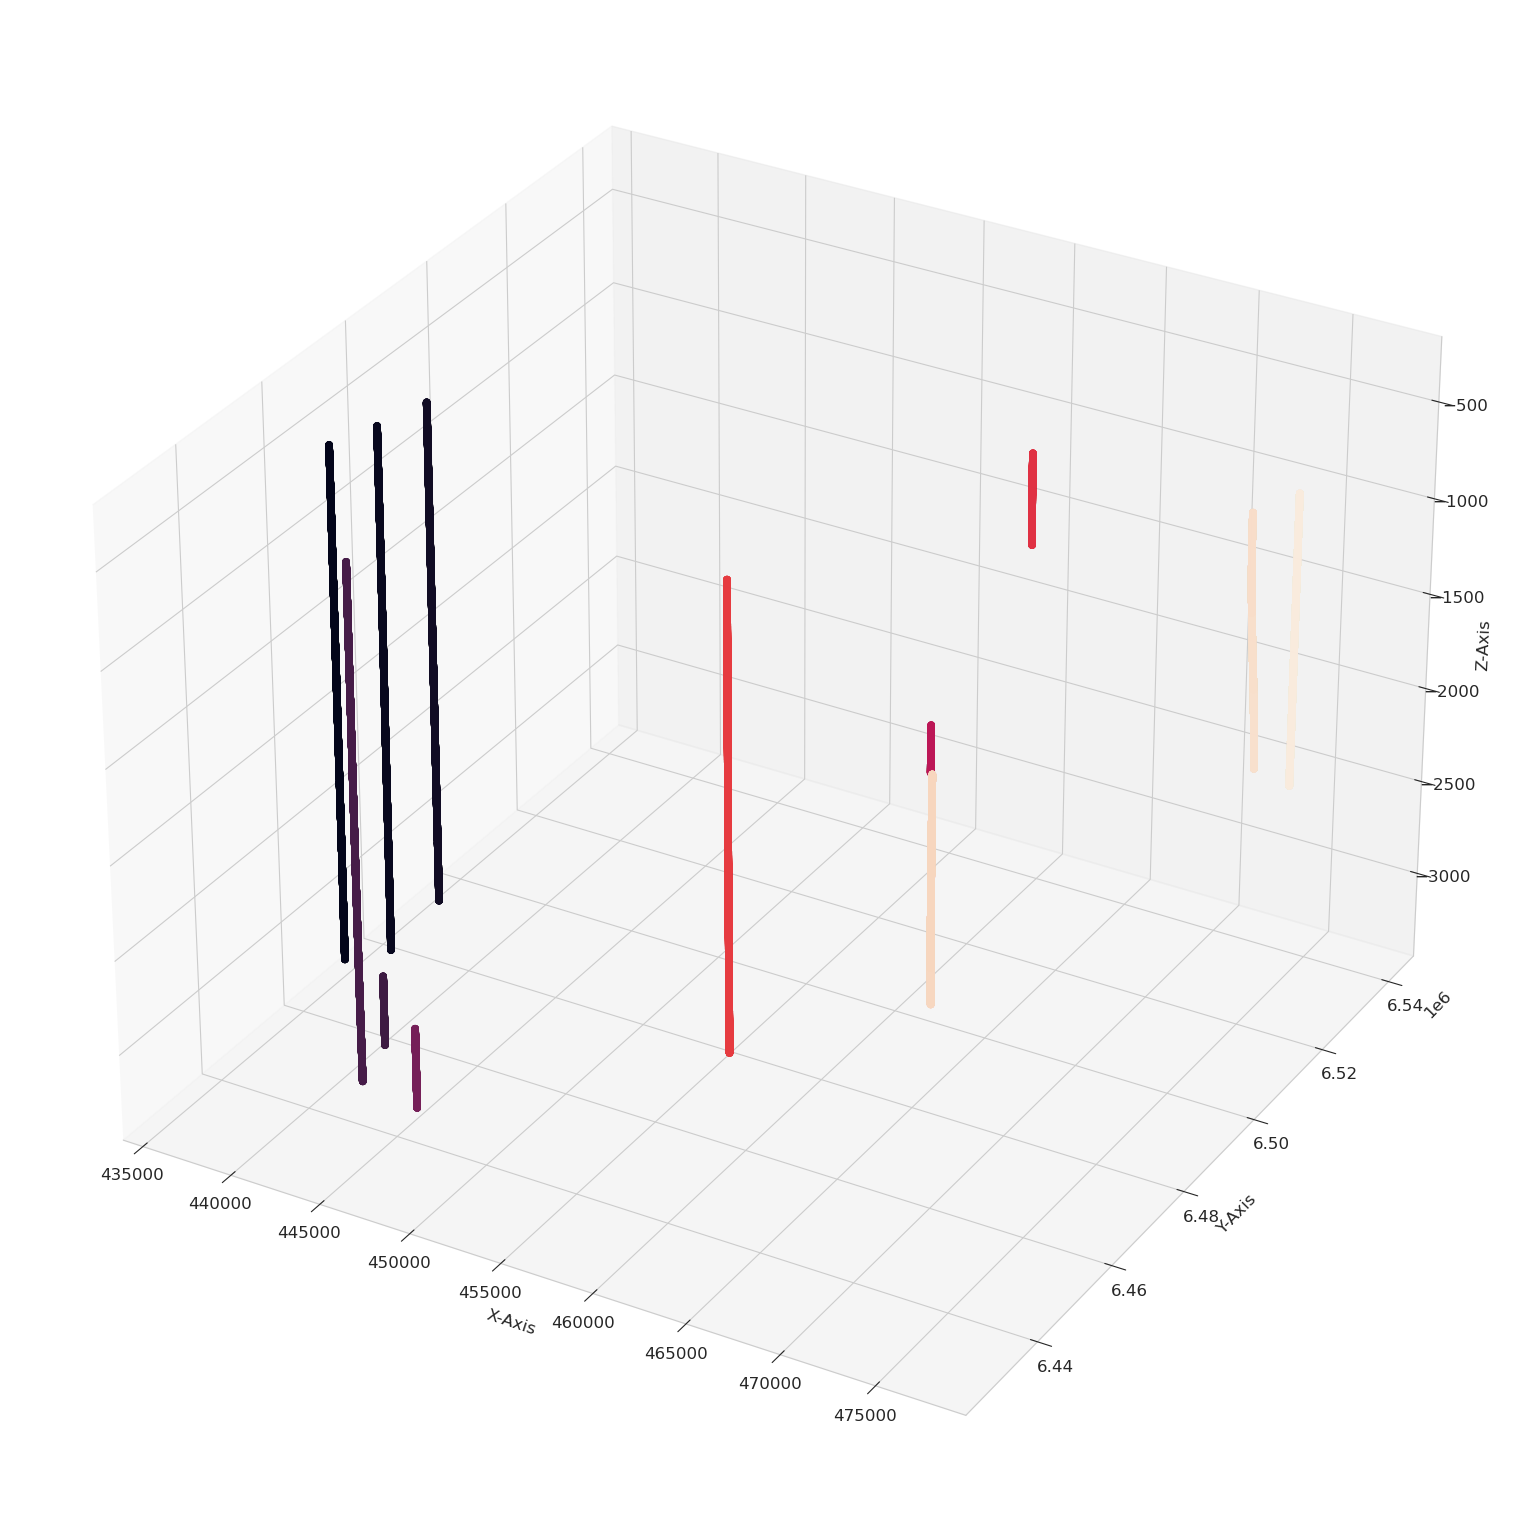

In [80]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(15,15))

ax = Axes3D(fig) 
x = df['X_LOC']
y = df['Y_LOC']
z = df['Z_LOC']

ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")


ax.scatter(x, y, z, c=x, marker='o', label ='WELLS')

plt.show()

## Visualize missing values

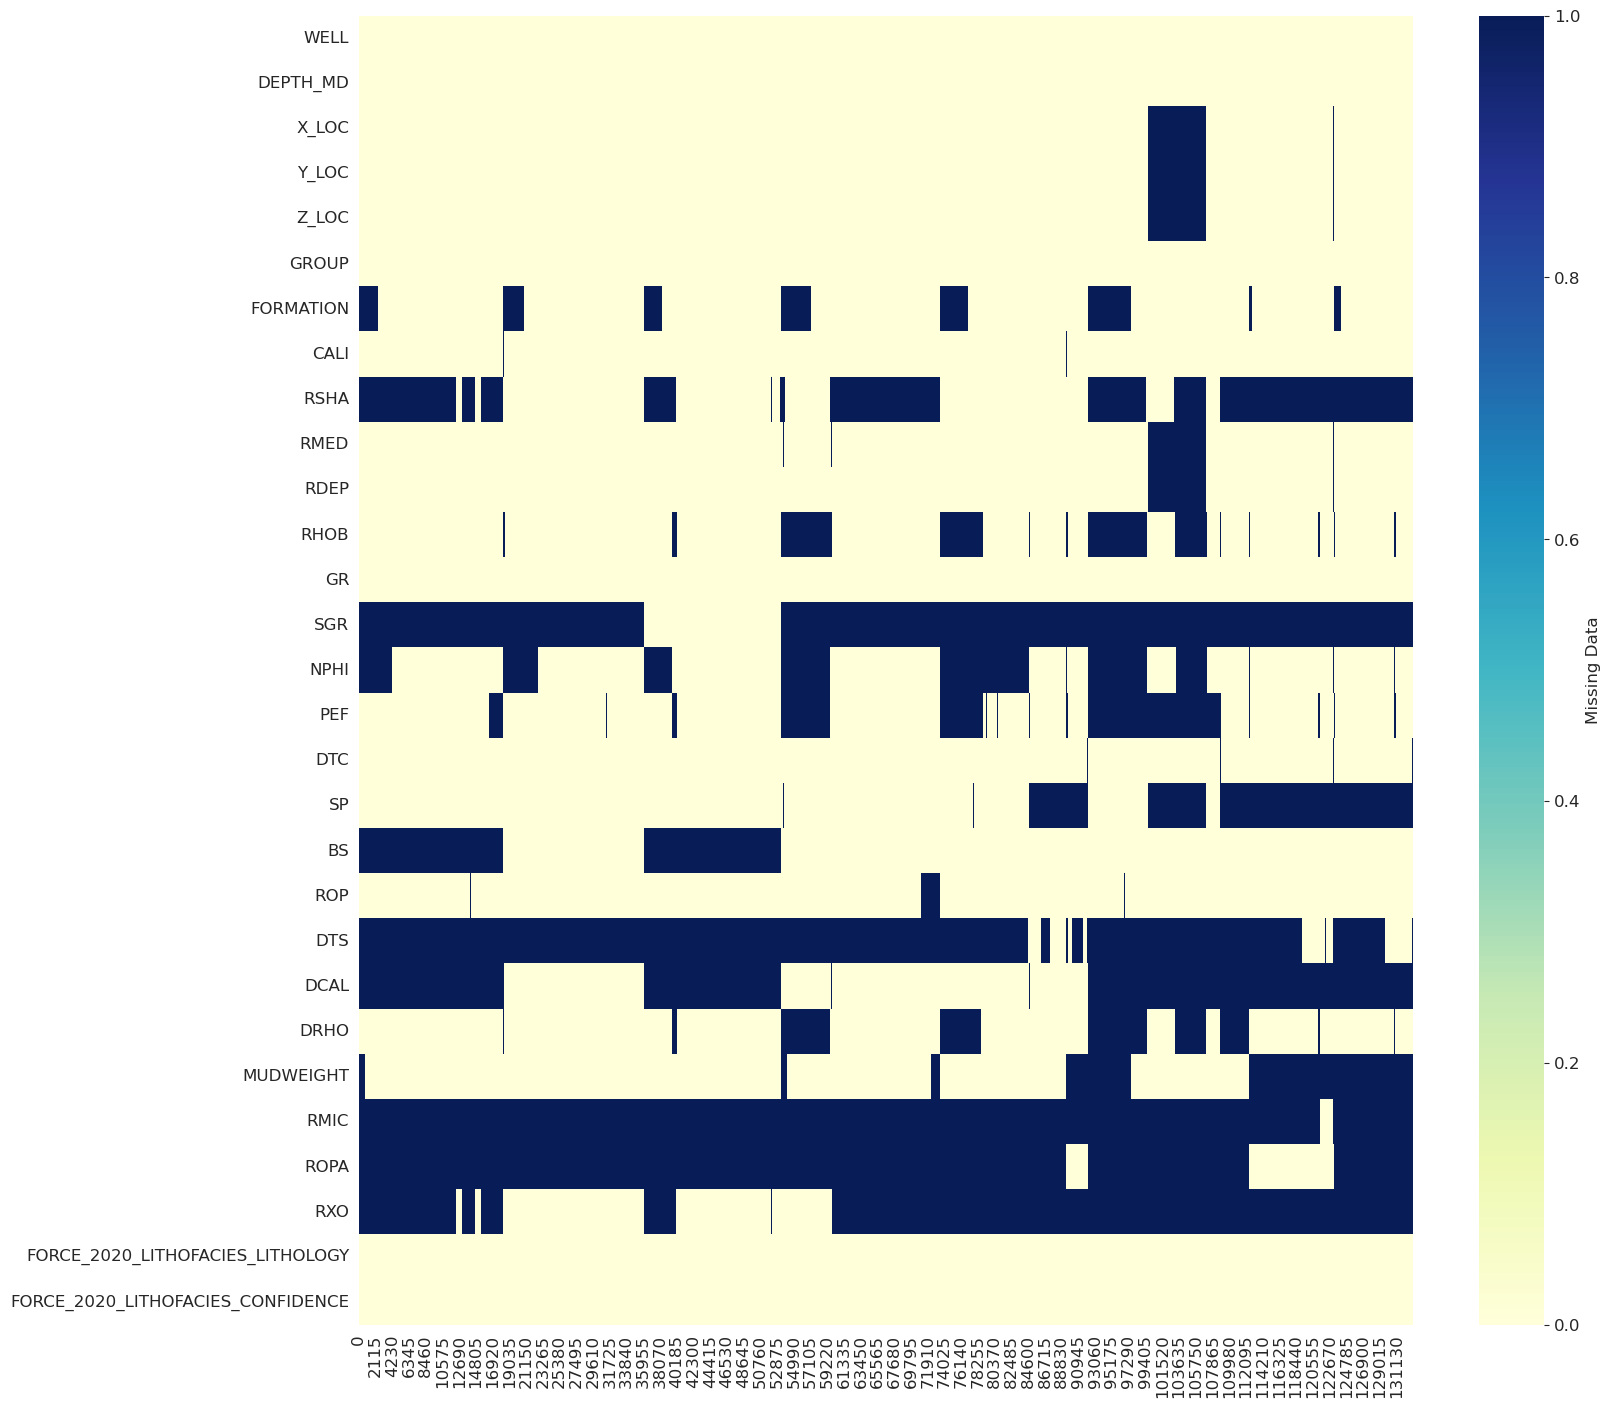

In [81]:
plt.figure(figsize=(17,17))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)


<Figure size 2000x3000 with 0 Axes>

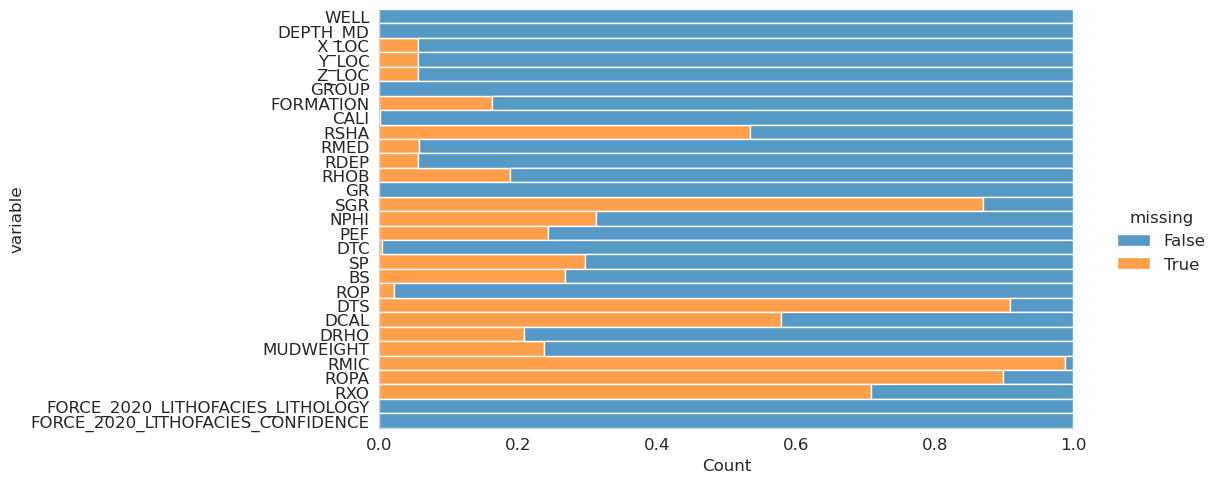

In [82]:
plt.figure(figsize=(20,30))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)



  ***droping unnecessary columns and columns with too many missing value, and Create new dataframe by the rest (dff) ***

In [166]:
dff=df.copy()
dff

WELL     DEPTH_MD        X_LOC      Y_LOC        Z_LOC  \
0       15/9-13   415.261599  437641.9688  6470972.5  -469.501831   
1       15/9-13   415.413599  437641.9688  6470972.5  -469.653809   
2       15/9-13   415.565599  437641.9688  6470972.5  -469.805786   
3       15/9-13   415.717599  437641.9688  6470972.5  -469.957794   
4       15/9-13   415.869599  437641.9688  6470972.5  -470.109772   
...         ...          ...          ...        ...          ...   
133193  16/2-16  3271.416000  476770.1250  6523587.5 -2180.926514   
133194  16/2-16  3271.568000  476770.1563  6523587.5 -2181.078613   
133195  16/2-16  3271.720000  476770.1563  6523587.5 -2181.230469   
133196  16/2-16  3271.872000  476770.1563  6523587.5 -2181.382324   
133197  16/2-16  3272.024000  476770.1563  6523587.5 -2181.534424   

                   GROUP      FORMATION       CALI  RSHA      RMED  ...  \
0           NORDLAND GP.            NaN  19.480835   NaN  1.611410  ...   
1           NORDLAND GP.            NaN  19.468800   NaN  1.618070  ...   
2           NORDLAND GP.            NaN  19.468800   NaN  1.626459  ...   
3           NORDLAND GP.            NaN  19.459282   NaN  1.621594  ...   
4           NORDLAND GP.            NaN  19.453100   NaN  1.602679  ...   
...                  ...            ...        ...   ...       ...  ...   
133193  ROTLIEGENDES GP.  Skagerrak Fm.   8.698007   NaN  5.382444  ...   
133194  ROTLIEGENDES GP.  Skagerrak Fm.   8.721210   NaN  5.651109  ...   
133195  ROTLIEGENDES GP.  Skagerrak Fm.   8.739136   NaN  5.870602  ...   
133196  ROTLIEGENDES GP.  Skagerrak Fm.   8.749738   NaN  5.756996  ...   
133197  ROTLIEGENDES GP.  Skagerrak Fm.   8.732694   NaN  5.544824  ...   

              ROP  DTS  DCAL      DRHO  MUDWEIGHT  RMIC  ROPA  RXO  \
0       34.636410  NaN   NaN -0.574928        NaN   NaN   NaN  NaN   
1       34.636410  NaN   NaN -0.570188        NaN   NaN   NaN  NaN   
2       34.779556  NaN   NaN -0.574245        NaN   NaN   NaN  NaN   
3       39.965164  NaN   NaN -0.586315        NaN   NaN   NaN  NaN   
4       57.483765  NaN   NaN -0.597914        NaN   NaN   NaN  NaN   
...           ...  ...   ...       ...        ...   ...   ...  ...   
133193  22.291321  NaN   NaN  0.107520        NaN   NaN   NaN  NaN   
133194  22.230320  NaN   NaN  0.101821        NaN   NaN   NaN  NaN   
133195  22.388054  NaN   NaN  0.097832        NaN   NaN   NaN  NaN   
133196  23.331690  NaN   NaN  0.092334        NaN   NaN   NaN  NaN   
133197  24.340328  NaN   NaN  0.090736        NaN   NaN   NaN  NaN   

        FORCE_2020_LITHOFACIES_LITHOLOGY  FORCE_2020_LITHOFACIES_CONFIDENCE  
0                                  65000                                1.0  
1                                  65000                                1.0  
2                                  65000                                1.0  
3                                  65000                                1.0  
4                                  65000                                1.0  
...                                  ...                                ...  
133193                             30000                                2.0  
133194                             30000                                2.0  
133195                             30000                                2.0  
133196                             30000                                2.0  
133197                             30000                                2.0  

[133198 rows x 29 columns]

In [109]:
dff.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [167]:
dff.drop(['RXO','ROPA','RMIC','DCAL','SGR','RSHA','DTS', 'BS','MUDWEIGHT','X_LOC','Y_LOC','ROP',"PEF" ,'Z_LOC'], axis=1 , inplace =True) 
dff.columns


Index(['WELL', 'DEPTH_MD', 'GROUP', 'FORMATION', 'CALI', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'DTC', 'SP', 'DRHO',
       'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [168]:
dff.columns


Index(['WELL', 'DEPTH_MD', 'GROUP', 'FORMATION', 'CALI', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'DTC', 'SP', 'DRHO',
       'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

<Figure size 2000x3000 with 0 Axes>

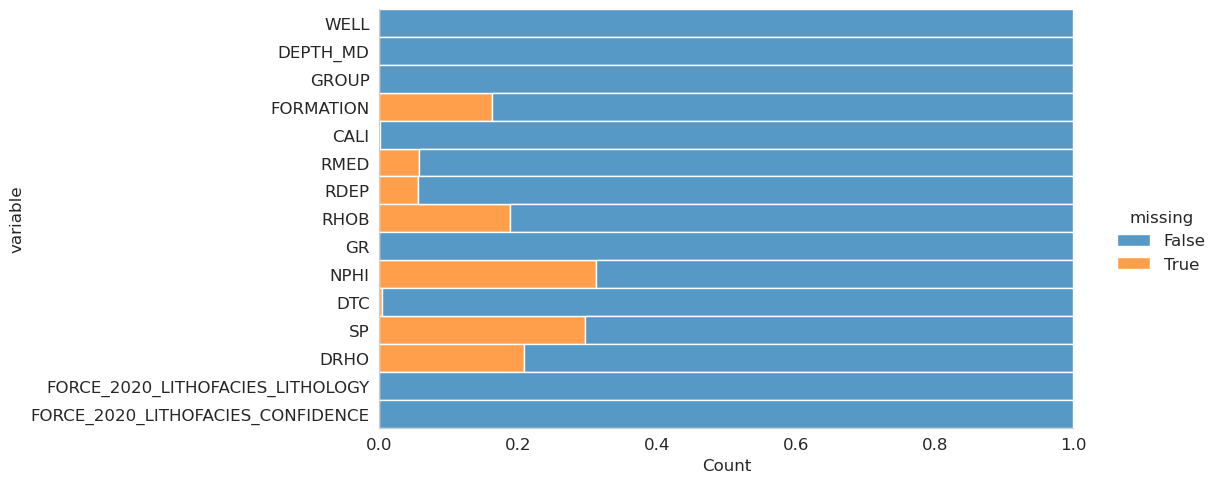

In [169]:
plt.figure(figsize=(20,30))
sns.displot(
    data=dff.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)



## Lithology Key

The lithology key for the curve “FORCE_2020_LITHOFACIES_LITHOLOGY” is shown below:

30000: Sandstone

65030: Sandstone/Shale

65000: Shale

80000: Marl

74000: Dolomite

70000: Limestone

70032: Chalk

88000: Halite

86000: Anhydrite

99000: Tuff

90000: Coal

93000: Basement

In [170]:
dff['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

65000    82390
30000    15794
70000    11912
65030     6573
70032     5129
80000     4968
88000     4314
99000     1498
86000      374
74000      188
90000       58
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

### Creating lithology Hatch

In [171]:
lithology_numbers = {30000: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 65030: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 65000: {'lith':'Shale', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                 80000: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 74000: {'lith':'Dolomite', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                 70000: {'lith':'Limestone', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 70032: {'lith':'Chalk', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 88000: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 86000: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'', 'color':'#ff80ff'},
                 99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'}}

In [172]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.index.name = 'LITHOLOGY'
df_lith

lith  lith_num hatch    color
LITHOLOGY                                          
30000            Sandstone         1    ..  #ffff00
65030      Sandstone/Shale         2    -.  #ffe119
65000                Shale         3    --  #bebebe
80000                 Marl         4        #7cfc00
74000             Dolomite         5    -/  #8080ff
70000            Limestone         6     +  #80ffff
70032                Chalk         7    ..  #80ffff
88000               Halite         8     x  #7ddfbe
86000            Anhydrite         9        #ff80ff
99000                 Tuff        10    ||  #ff8c00
90000                 Coal        11          black

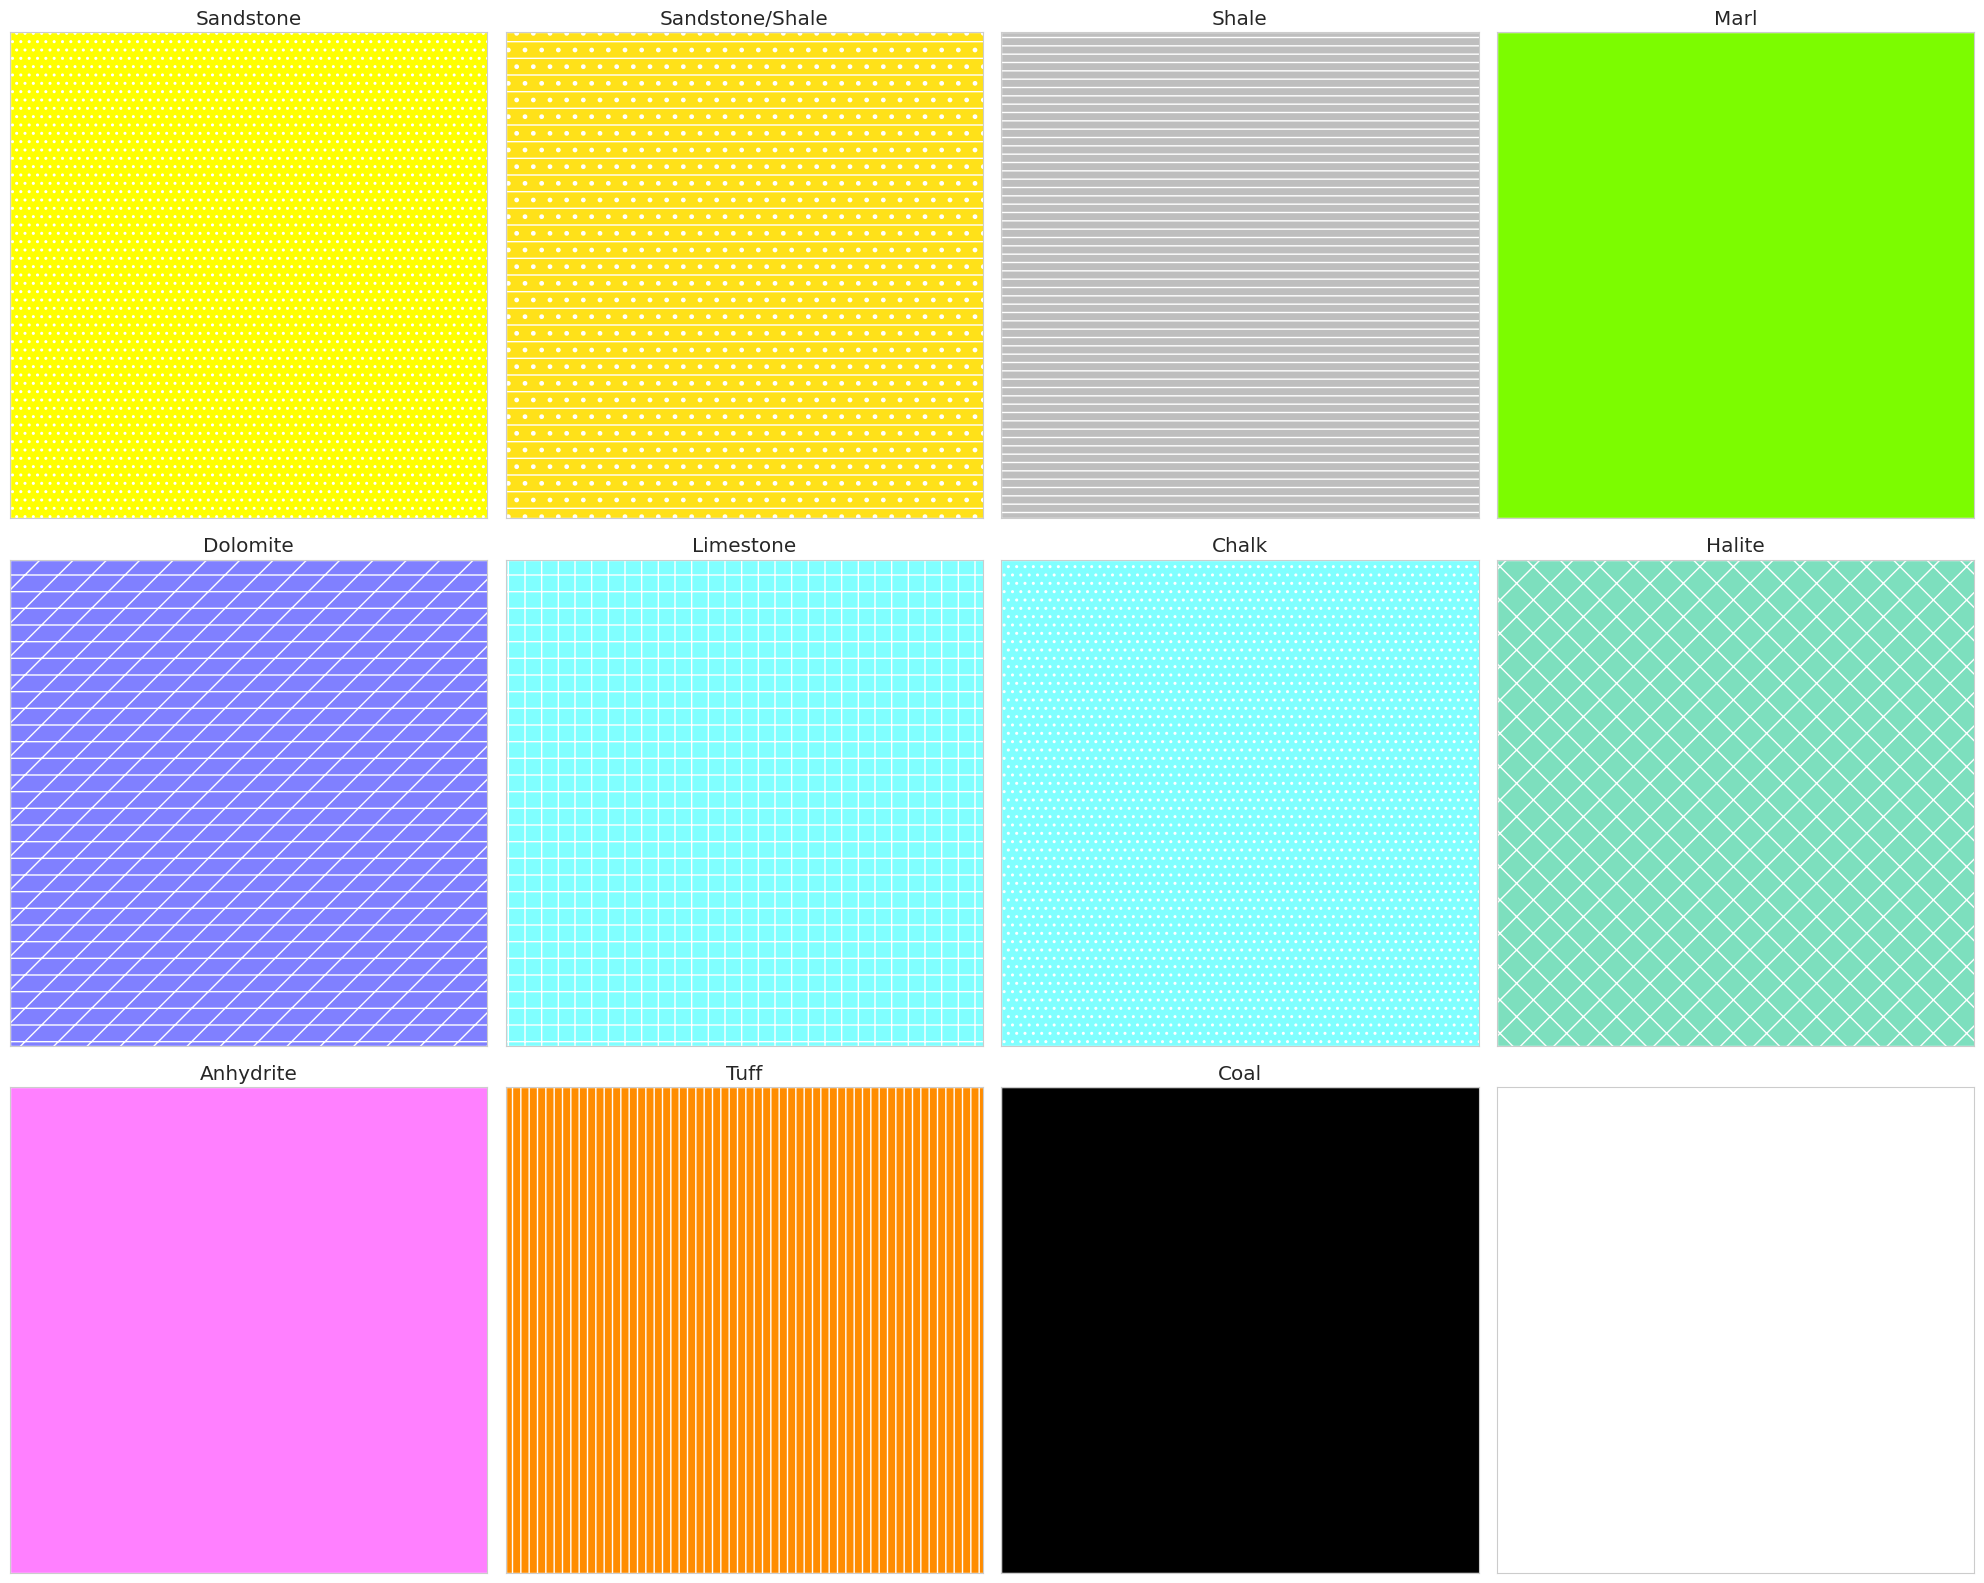

In [173]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=3, sharex=True, sharey=True,
                         figsize=(20,16), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

In [174]:
dff['FORCE_2020_LITHOFACIES_CONFIDENCE'].value_counts()

1.0    105172
2.0     24618
3.0      3393
Name: FORCE_2020_LITHOFACIES_CONFIDENCE, dtype: int64

In [175]:
#change Columns Name 
dff.columns = dff.columns.str.replace('FORCE_2020_LITHOFACIES_LITHOLOGY', 'lithology')
dff.columns = dff.columns.str.replace('FORCE_2020_LITHOFACIES_CONFIDENCE', 'lithology_confidance')

dff.columns

Index(['WELL', 'DEPTH_MD', 'GROUP', 'FORMATION', 'CALI', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'DTC', 'SP', 'DRHO', 'lithology',
       'lithology_confidance'],
      dtype='object')

In [176]:
dff.describe().T

count          mean           std           min  \
DEPTH_MD              133198.0   1792.944663    739.441515    415.261599   
CALI                  133006.0     13.199399      3.561386      5.946157   
RMED                  125556.0      1.708851      9.127200     -0.008419   
RDEP                  125805.0      1.743774     13.233330      0.123068   
RHOB                  108053.0      2.199556      0.236902      1.366913   
GR                    133198.0     69.553872     39.328728      0.109284   
NPHI                   91725.0      0.355602      0.143857     -0.023143   
DTC                   132635.0    122.700286     34.234879      7.415132   
SP                     93680.0     91.608922     98.781404     -2.199269   
DRHO                  105539.0      0.009307      0.067312     -1.795894   
lithology             133198.0  63261.582892  13623.352961  30000.000000   
lithology_confidance  133183.0      1.235796      0.480781      1.000000   

                               25%           50%           75%           max  
DEPTH_MD               1182.822400   1747.524496   2413.874901   3272.024000  
CALI                     11.381848     12.698571     14.944049     25.717396  
RMED                      0.779763      1.095681      1.535653   1796.209106  
RDEP                      0.777323      1.130621      1.644573   1856.935059  
RHOB                      2.029237      2.162121      2.404375      3.115611  
GR                       43.244637     66.266132     93.808681    804.298950  
NPHI                      0.234927      0.382014      0.480985      0.817310  
DTC                      87.899776    135.968094    147.388626    230.432953  
SP                       48.808243     70.282761     92.173889    526.547302  
DRHO                     -0.007736      0.003215      0.022928      0.433157  
lithology             65000.000000  65000.000000  65030.000000  99000.000000  
lithology_confidance      1.000000      1.000000      1.000000      3.000000

In [177]:
dff.shape

(133198, 15)

***Adjust Gamma Ray range-log***

<AxesSubplot:xlabel='GR'>

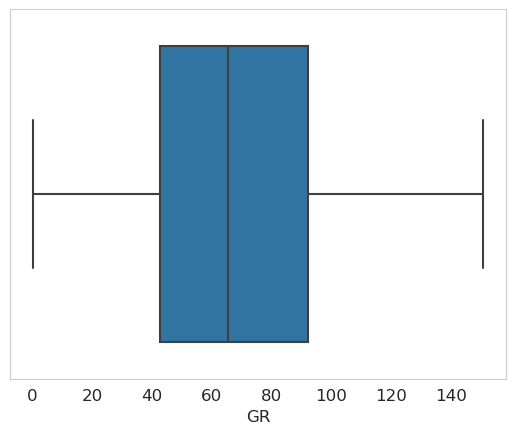

In [178]:

dff = dff[dff['GR'] <= 151]
sns.boxplot(x=dff['GR'])

## source: https://wiki.aapg.org/Quick-look_lithology_from_logs#Shale_3

In [179]:
dff.shape

(131163, 15)

In [180]:
dff['GR'].describe()

count    131163.000000
mean         67.465755
std          34.901103
min           0.109284
25%          42.704906
50%          65.651543
75%          92.349979
max         150.987274
Name: GR, dtype: float64

In [181]:
dff

WELL     DEPTH_MD             GROUP      FORMATION       CALI  \
0       15/9-13   415.261599      NORDLAND GP.            NaN  19.480835   
1       15/9-13   415.413599      NORDLAND GP.            NaN  19.468800   
2       15/9-13   415.565599      NORDLAND GP.            NaN  19.468800   
3       15/9-13   415.717599      NORDLAND GP.            NaN  19.459282   
4       15/9-13   415.869599      NORDLAND GP.            NaN  19.453100   
...         ...          ...               ...            ...        ...   
133193  16/2-16  3271.416000  ROTLIEGENDES GP.  Skagerrak Fm.   8.698007   
133194  16/2-16  3271.568000  ROTLIEGENDES GP.  Skagerrak Fm.   8.721210   
133195  16/2-16  3271.720000  ROTLIEGENDES GP.  Skagerrak Fm.   8.739136   
133196  16/2-16  3271.872000  ROTLIEGENDES GP.  Skagerrak Fm.   8.749738   
133197  16/2-16  3272.024000  ROTLIEGENDES GP.  Skagerrak Fm.   8.732694   

            RMED      RDEP      RHOB          GR  NPHI         DTC         SP  \
0       1.611410  1.798681  1.884186   80.200851   NaN  161.131180  24.612379   
1       1.618070  1.795641  1.889794   79.262886   NaN  160.603470  23.895531   
2       1.626459  1.800733  1.896523   74.821999   NaN  160.173615  23.916357   
3       1.621594  1.801517  1.891913   72.878922   NaN  160.149429  23.793688   
4       1.602679  1.795299  1.880034   71.729141   NaN  160.128342  24.104078   
...          ...       ...       ...         ...   ...         ...        ...   
133193  5.382444  5.339929  2.531374  127.456139   NaN         NaN        NaN   
133194  5.651109  5.689734  2.526128  128.403305   NaN         NaN        NaN   
133195  5.870602  5.496074  2.528934  127.829262   NaN         NaN        NaN   
133196  5.756996  5.345353  2.527052  126.552277   NaN         NaN        NaN   
133197  5.544824  5.183348  2.533866  128.842270   NaN         NaN        NaN   

            DRHO  lithology  lithology_confidance  
0      -0.574928      65000                   1.0  
1      -0.570188      65000                   1.0  
2      -0.574245      65000                   1.0  
3      -0.586315      65000                   1.0  
4      -0.597914      65000                   1.0  
...          ...        ...                   ...  
133193  0.107520      30000                   2.0  
133194  0.101821      30000                   2.0  
133195  0.097832      30000                   2.0  
133196  0.092334      30000                   2.0  
133197  0.090736      30000                   2.0  

[131163 rows x 15 columns]

***Adjust Photo Electric Factor log***

In [186]:
dff.shape

(131163, 15)

In [187]:
dff['SP'].describe()

count    92651.000000
mean        91.109922
std         98.651437
min         -2.199269
25%         48.677019
50%         69.716881
75%         91.543056
max        526.547302
Name: SP, dtype: float64

In [188]:
dff=dff[dff['SP'] <= 100]
dff['SP'].describe()

count    74331.000000
mean        60.531427
std         22.215339
min         -2.199269
25%         42.842331
50%         59.512421
75%         79.240082
max         99.994675
Name: SP, dtype: float64

<AxesSubplot:xlabel='SP'>

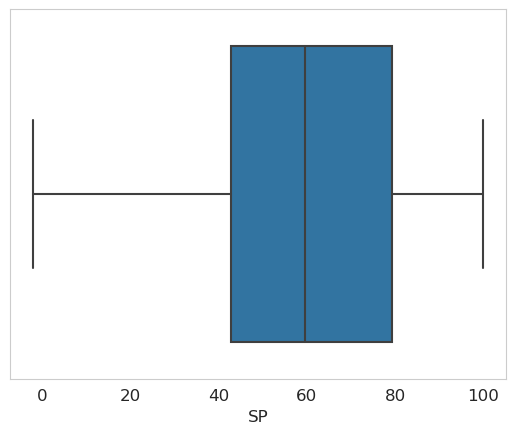

In [189]:
dff = dff[dff['SP'] <= 151]
sns.boxplot(x=dff['SP'])


<Figure size 2000x3000 with 0 Axes>

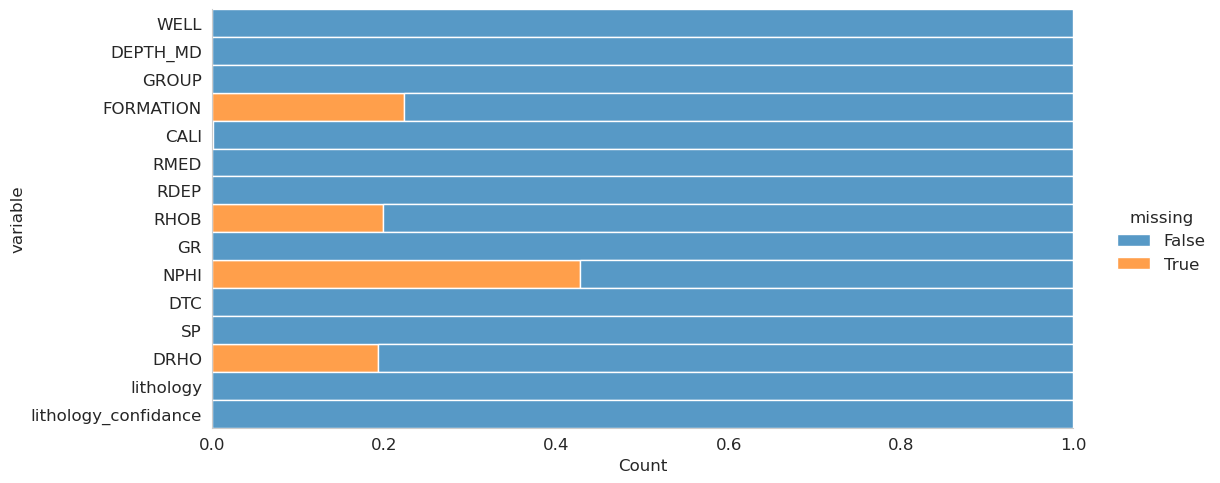

In [190]:
plt.figure(figsize=(20,30))
sns.displot(
    data=dff.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)



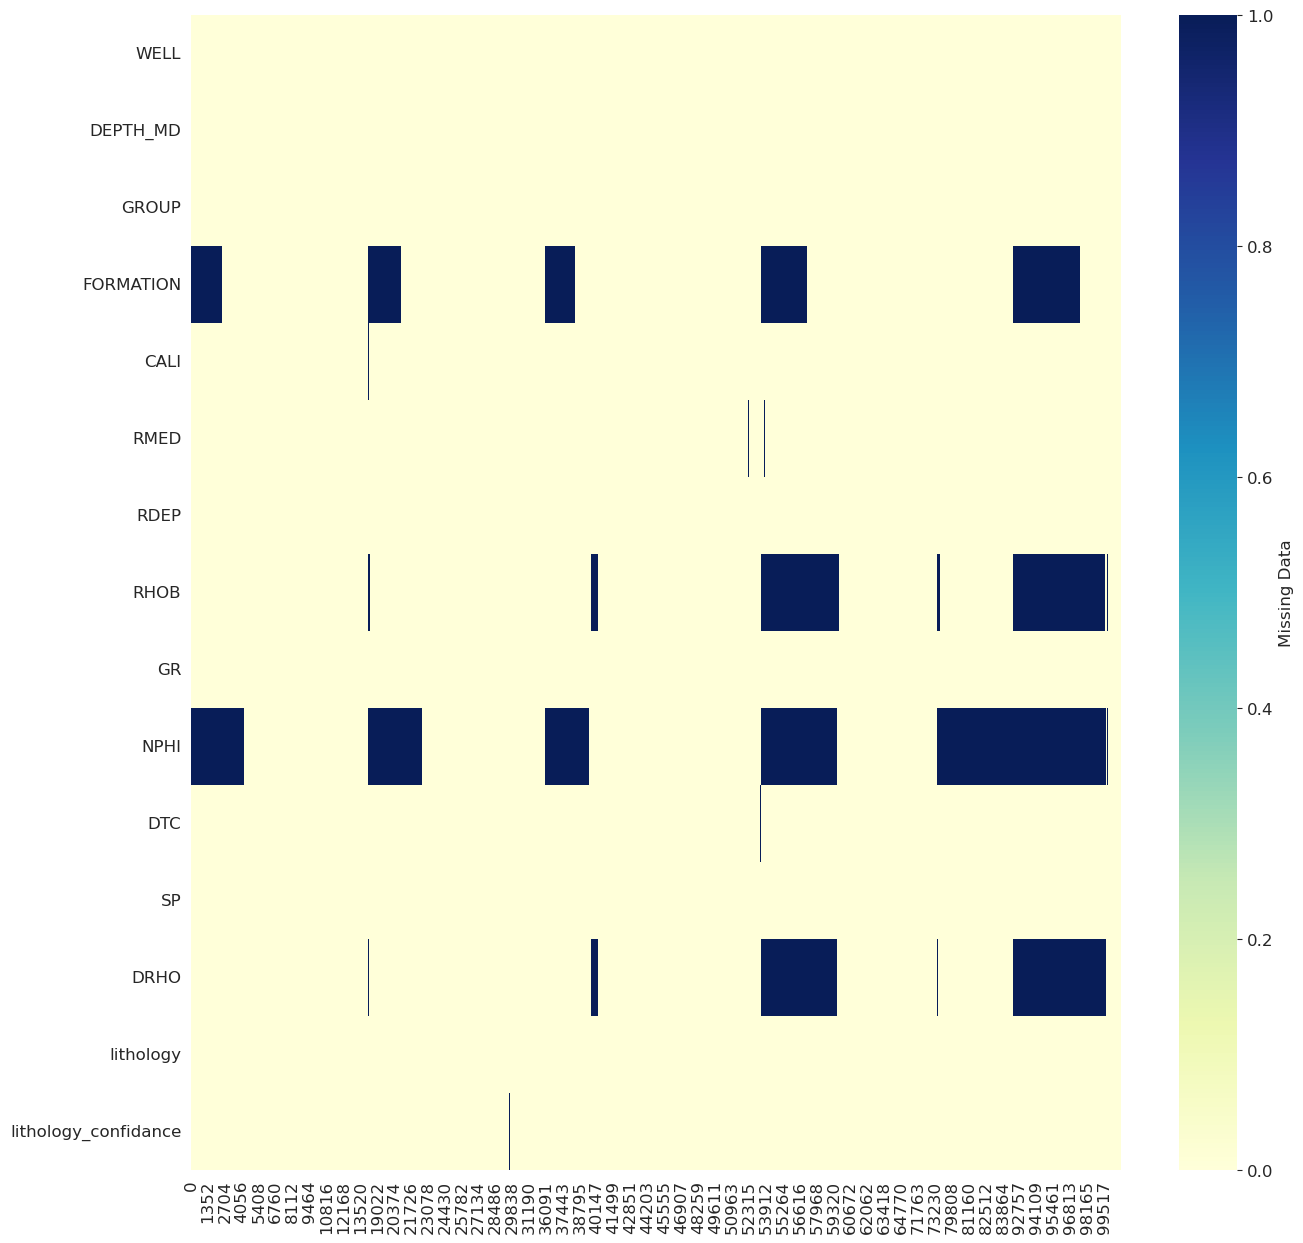

In [191]:
plt.figure(figsize=(15,15))
sns.heatmap(dff.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)


In [192]:
"""plt.figure(figsize=(15,15))
sns.heatmap(dff.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)
"""

'plt.figure(figsize=(15,15))\nsns.heatmap(dff.isna().transpose(),\n            cmap="YlGnBu",\n            cbar_kws={\'label\': \'Missing Data\'})\nplt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)\n'

In [195]:
dff.shape

(74331, 15)

In [196]:
x=55000 # could change x and y to a start and end 
y=58800 
dff.loc[x:y]
dff.drop(dff.loc[x:y].index, inplace=True)


In [197]:
n=93000 # could change x and y to a start and end 
m=10000 
dff.loc[n:m]
dff.drop(dff.loc[n:m].index, inplace=True)


In [198]:
q=100800 # could change x and y to a start and end date
a=107000
dff.loc[q:a]
dff.drop(dff.loc[q:a].index, inplace=True)


In [199]:
dff.isna().sum()

WELL                        0
DEPTH_MD                    0
GROUP                       0
FORMATION               14374
CALI                       93
RMED                       65
RDEP                       14
RHOB                    10989
GR                          0
NPHI                    27953
DTC                        40
SP                          0
DRHO                    10531
lithology                   0
lithology_confidance        7
dtype: int64

In [200]:
dff.shape

(70530, 15)

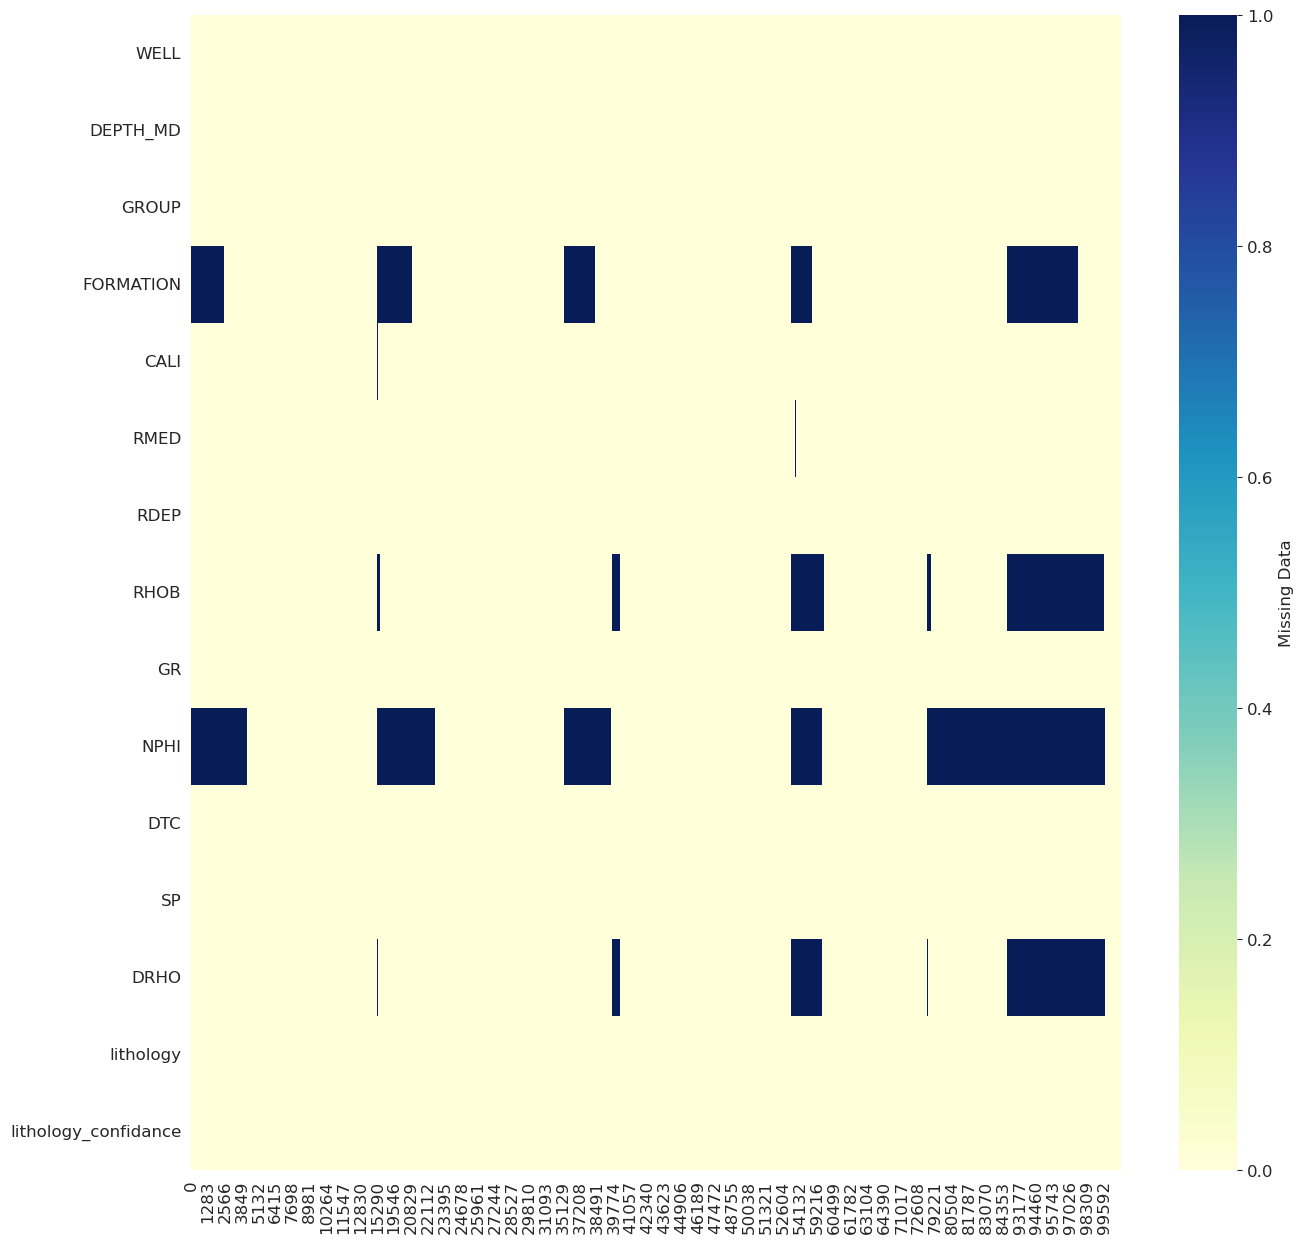

In [201]:
plt.figure(figsize=(15,15))
sns.heatmap(dff.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)



<Figure size 2000x3000 with 0 Axes>

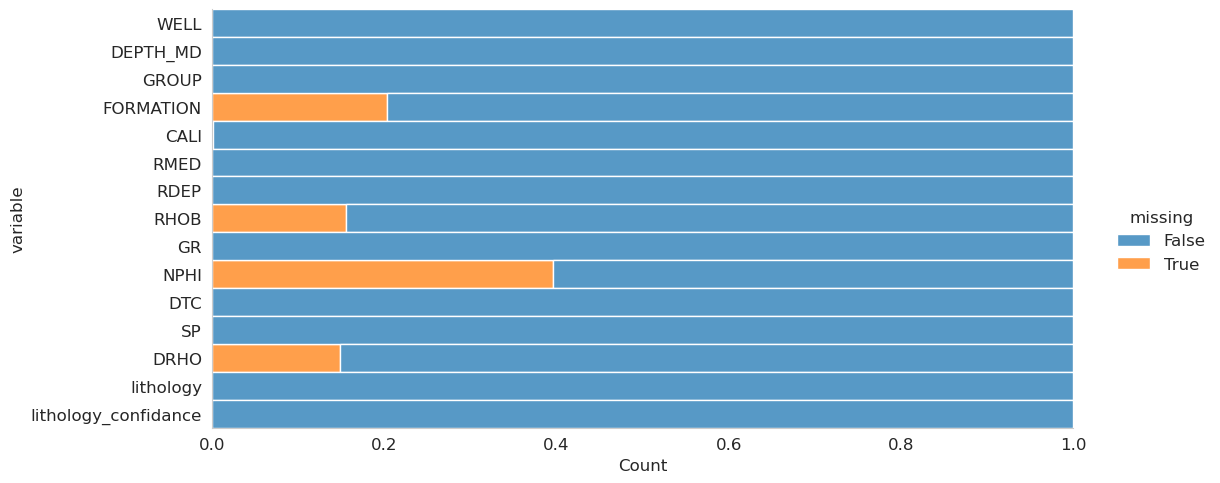

In [202]:
plt.figure(figsize=(20,30))
sns.displot(
    data=dff.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)



<AxesSubplot:>

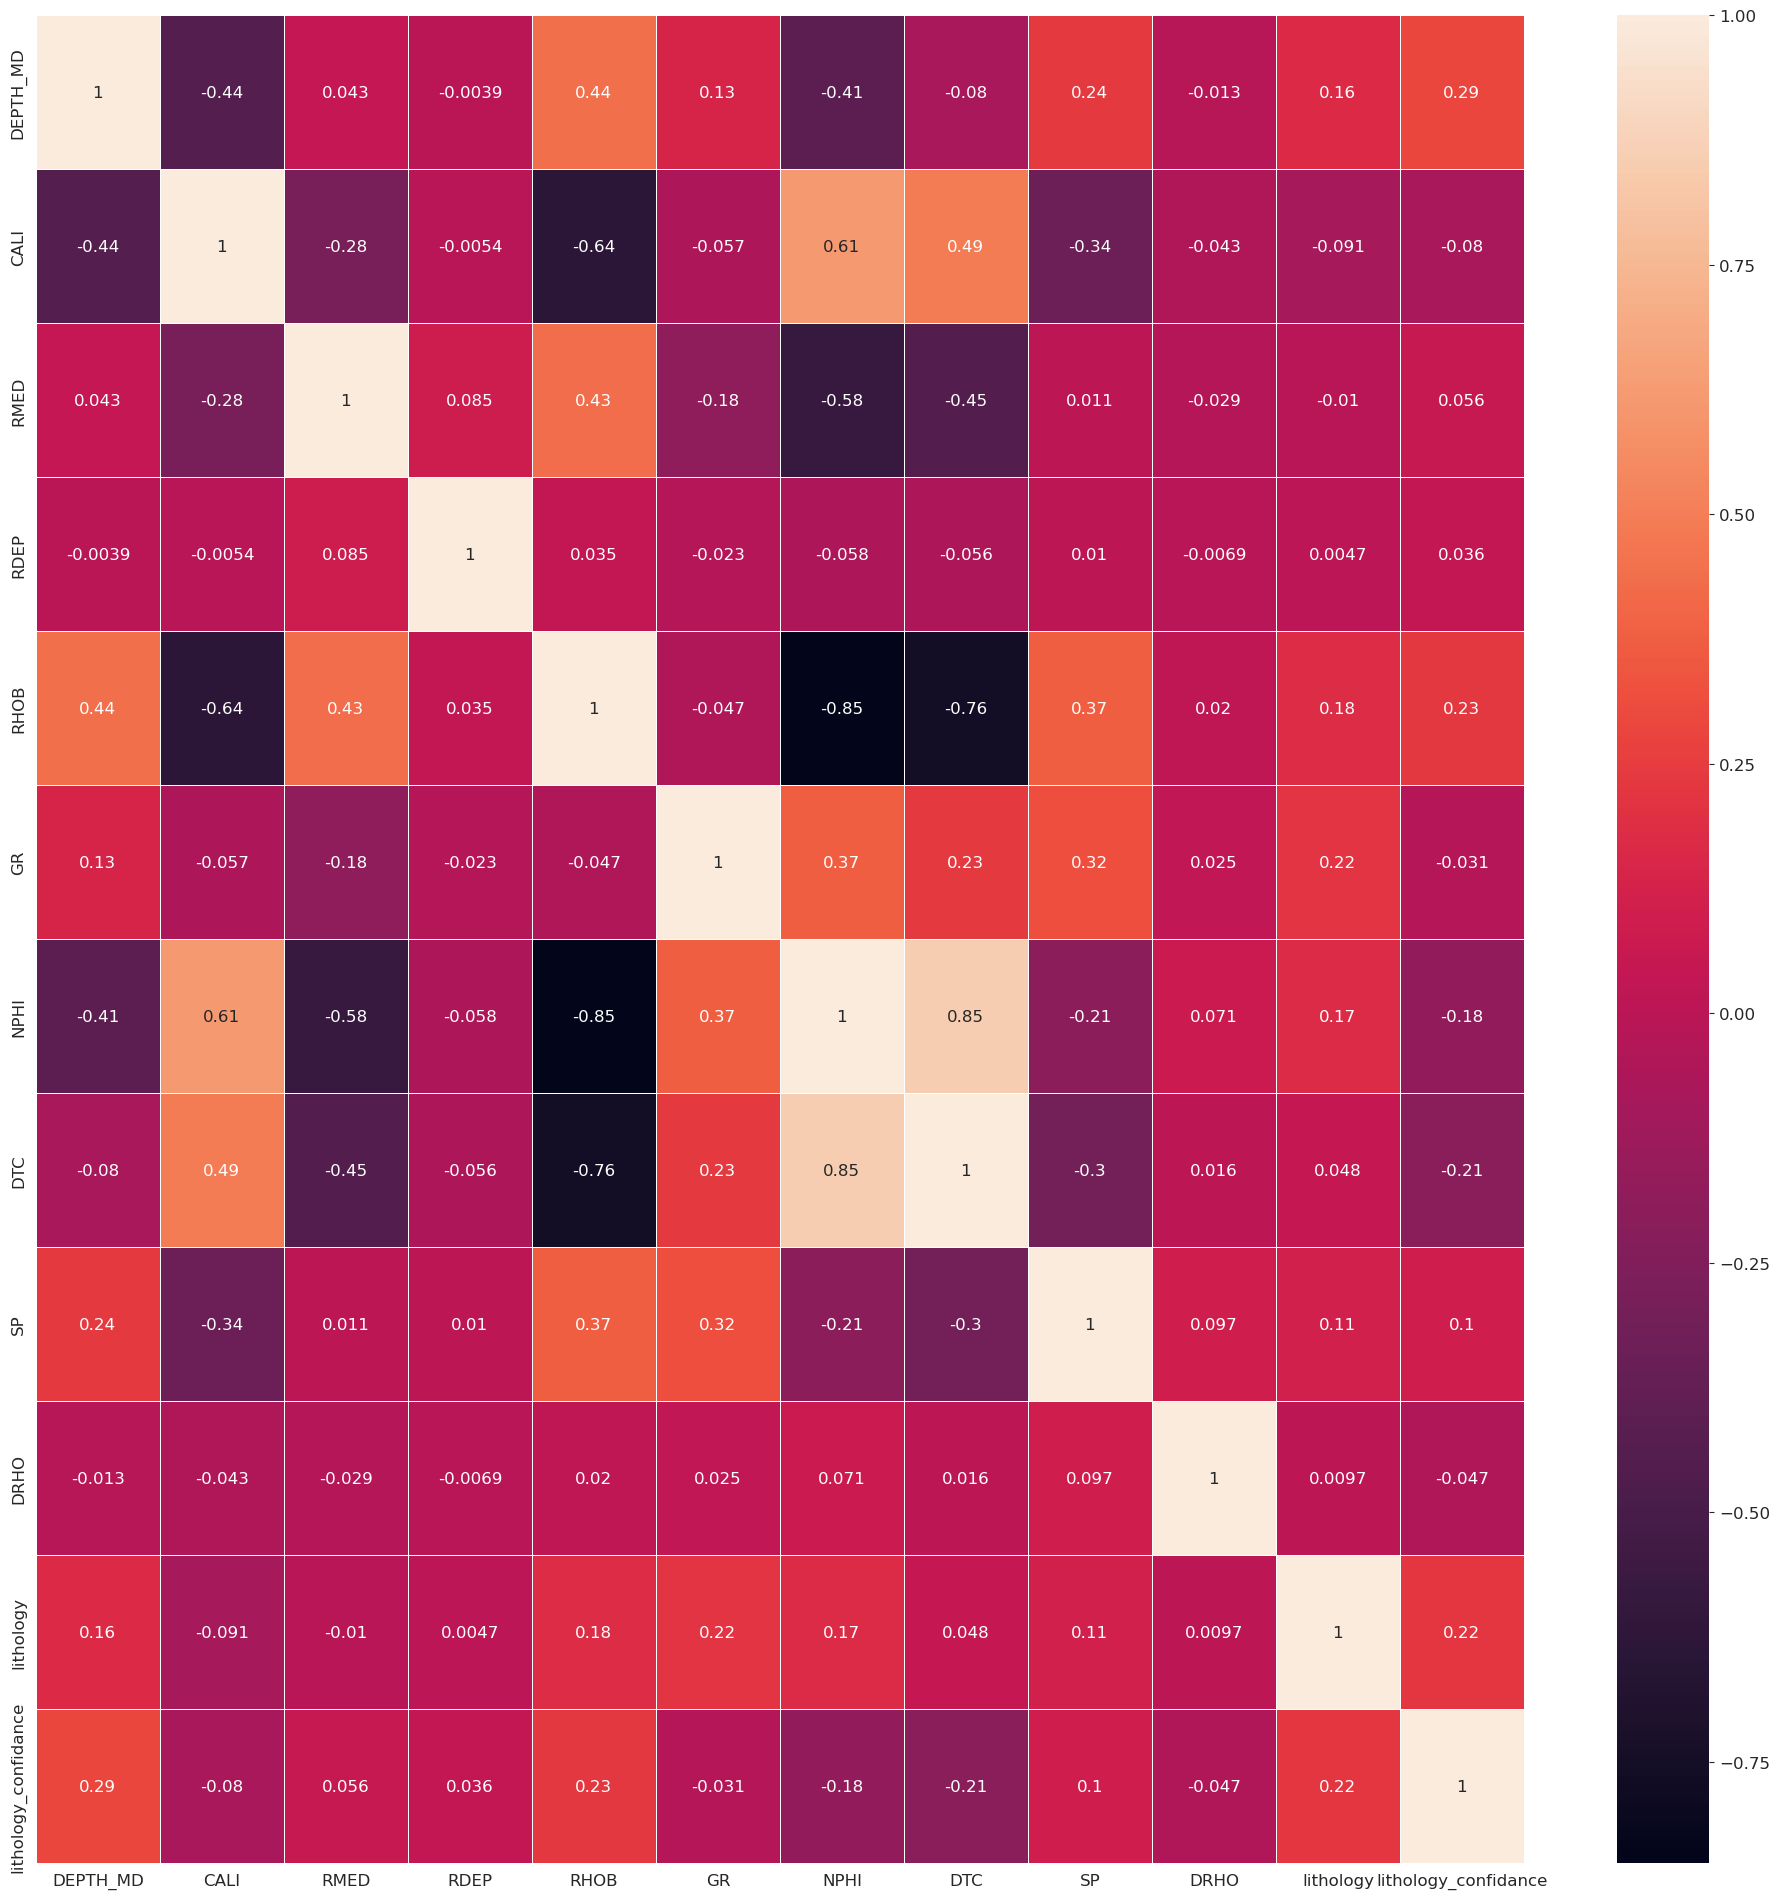

In [203]:
cor=dff.corr()
cor
#for linear correlation 
plt.figure(figsize=(24,24))
#p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn')  
sns.heatmap(cor, annot = True, linewidths=0.5)

In [204]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70530 entries, 0 to 108841
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WELL                  70530 non-null  object 
 1   DEPTH_MD              70530 non-null  float64
 2   GROUP                 70530 non-null  object 
 3   FORMATION             56156 non-null  object 
 4   CALI                  70437 non-null  float64
 5   RMED                  70465 non-null  float64
 6   RDEP                  70516 non-null  float64
 7   RHOB                  59541 non-null  float64
 8   GR                    70530 non-null  float64
 9   NPHI                  42577 non-null  float64
 10  DTC                   70490 non-null  float64
 11  SP                    70530 non-null  float64
 12  DRHO                  59999 non-null  float64
 13  lithology             70530 non-null  int64  
 14  lithology_confidance  70523 non-null  float64
dtypes: float64(11), in

In [205]:
# % of nan values in NPHI 
dff['NPHI'].isna().sum()/len(dff['NPHI'])*100

39.63278037714448

In [206]:
# % of nan values in SP 

dff['SP'].isna().sum()/len(dff['SP'])*100

0.0

## Label Encoding 

In [207]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = ["GROUP","FORMATION","WELL"]
for i in columns:
    dff[i] = encoder.fit_transform(dff[i])

### Deal Nan values - using scikit learn KNNImputer

In [208]:

"""df_imputer_knn_sklearn = dff.copy(deep=True)
from sklearn.impute import KNNImputer 
knnimputer=KNNImputer(n_neighbors=3)
df_imputer_knn_sklearn.iloc[:,:]=knnimputer.fit_transform(df_imputer_knn_sklearn)
df_imputer_knn_sklearn.isna().sum()
df_imputer_knn_sklearn.head()"""

'df_imputer_knn_sklearn = dff.copy(deep=True)\nfrom sklearn.impute import KNNImputer \nknnimputer=KNNImputer(n_neighbors=3)\ndf_imputer_knn_sklearn.iloc[:,:]=knnimputer.fit_transform(df_imputer_knn_sklearn)\ndf_imputer_knn_sklearn.isna().sum()\ndf_imputer_knn_sklearn.head()'

### Deal Nan values - using Fancyimpute learn itrative impute -Mice

In [209]:
"!pip install fancyimpute"
"""from sklearn.experimental import enable_iterative_imputer
from fancyimpute import IterativeImputer
df_imputer_mice= dff.copy(deep=True)
df_imputer_mice.isna().sum()
iterativeimputer=IterativeImputer()
df_imputer_mice.iloc[:,:]=iterativeimputer.fit_transform(df_imputer_mice)
df_imputer_mice.isna().sum()"""

'from sklearn.experimental import enable_iterative_imputer\nfrom fancyimpute import IterativeImputer\ndf_imputer_mice= dff.copy(deep=True)\ndf_imputer_mice.isna().sum()\niterativeimputer=IterativeImputer()\ndf_imputer_mice.iloc[:,:]=iterativeimputer.fit_transform(df_imputer_mice)\ndf_imputer_mice.isna().sum()'

### Deal Nan values - using scikit learn iterative

In [210]:
"""from sklearn.impute import IterativeImputer
df_imputer_it_sklearn=dff.copy(deep=True)
df_imputer_knn_sklearn.head()
df_imputer_it_sklearn.isna().sum()
iterimp=IterativeImputer()
df_imputer_it_sklearn.iloc[:,:] = iterimp.fit_transform(df_imputer_it_sklearn)
df_imputer_it_sklearn.isna().sum()"""

'from sklearn.impute import IterativeImputer\ndf_imputer_it_sklearn=dff.copy(deep=True)\ndf_imputer_knn_sklearn.head()\ndf_imputer_it_sklearn.isna().sum()\niterimp=IterativeImputer()\ndf_imputer_it_sklearn.iloc[:,:] = iterimp.fit_transform(df_imputer_it_sklearn)\ndf_imputer_it_sklearn.isna().sum()'

  ***Save Dataframe (knn-itimputer-mice)  as csv***

In [211]:
"""df_imputer_it_sklearn.to_csv('df_itimputer.csv')
df_imputer_mice.to_csv('df_knn_mice.csv')
df_imputer_knn_sklearn.to_csv('df_knn_sklearn.csv')"""

"df_imputer_it_sklearn.to_csv('df_itimputer.csv')\ndf_imputer_mice.to_csv('df_knn_mice.csv')\ndf_imputer_knn_sklearn.to_csv('df_knn_sklearn.csv')"

***open saved Dataframes (imputer , Mice , KNN)***

In [212]:
df_itskl=pd.read_csv('/kaggle/input/lithology-classification/df_itimputer.csv')
df_itskl.drop(['Unnamed: 0'], axis =1 , inplace = True)
df_itskl.head()

WELL    DEPTH_MD  GROUP  FORMATION       CALI      RMED      RDEP  \
0   0.0  415.261599    3.0       30.0  19.480835  1.611410  1.798681   
1   0.0  415.413599    3.0       30.0  19.468800  1.618070  1.795641   
2   0.0  415.565599    3.0       30.0  19.468800  1.626459  1.800733   
3   0.0  415.717599    3.0       30.0  19.459282  1.621594  1.801517   
4   0.0  415.869599    3.0       30.0  19.453100  1.602679  1.795299   

       RHOB         GR      NPHI        PEF         DTC         SP      DRHO  \
0  1.884186  80.200851  0.564311  20.915468  161.131180  24.612379 -0.574928   
1  1.889794  79.262886  0.558845  19.383013  160.603470  23.895531 -0.570188   
2  1.896523  74.821999  0.555486  22.591518  160.173615  23.916357 -0.574245   
3  1.891913  72.878922  0.568313  32.191910  160.149429  23.793688 -0.586315   
4  1.880034  71.729141  0.578912  38.495632  160.128342  24.104078 -0.597914   

   lithology  lithology_confidance  
0    65000.0                   1.0  
1    65000.0                   1.0  
2    65000.0                   1.0  
3    65000.0                   1.0  
4    65000.0                   1.0

In [213]:
df_itskl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98920 entries, 0 to 98919
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WELL                  98920 non-null  float64
 1   DEPTH_MD              98920 non-null  float64
 2   GROUP                 98920 non-null  float64
 3   FORMATION             98920 non-null  float64
 4   CALI                  98920 non-null  float64
 5   RMED                  98920 non-null  float64
 6   RDEP                  98920 non-null  float64
 7   RHOB                  98920 non-null  float64
 8   GR                    98920 non-null  float64
 9   NPHI                  98920 non-null  float64
 10  PEF                   98920 non-null  float64
 11  DTC                   98920 non-null  float64
 12  SP                    98920 non-null  float64
 13  DRHO                  98920 non-null  float64
 14  lithology             98920 non-null  float64
 15  lithology_confidanc

In [214]:
df_itskl.isna().sum()

WELL                    0
DEPTH_MD                0
GROUP                   0
FORMATION               0
CALI                    0
RMED                    0
RDEP                    0
RHOB                    0
GR                      0
NPHI                    0
PEF                     0
DTC                     0
SP                      0
DRHO                    0
lithology               0
lithology_confidance    0
dtype: int64

In [215]:
df_knnmice=pd.read_csv('/kaggle/input/lithology-classification/df_knn_mice.csv')
df_knnmice.drop(['Unnamed: 0'], axis =1 , inplace = True)
df_knnmice.head()

WELL    DEPTH_MD  GROUP  FORMATION       CALI      RMED      RDEP  \
0   0.0  415.261599    3.0       30.0  19.480835  1.611410  1.798681   
1   0.0  415.413599    3.0       30.0  19.468800  1.618070  1.795641   
2   0.0  415.565599    3.0       30.0  19.468800  1.626459  1.800733   
3   0.0  415.717599    3.0       30.0  19.459282  1.621594  1.801517   
4   0.0  415.869599    3.0       30.0  19.453100  1.602679  1.795299   

       RHOB         GR      NPHI        PEF         DTC         SP      DRHO  \
0  1.884186  80.200851  0.564311  20.915468  161.131180  24.612379 -0.574928   
1  1.889794  79.262886  0.558845  19.383013  160.603470  23.895531 -0.570188   
2  1.896523  74.821999  0.555486  22.591518  160.173615  23.916357 -0.574245   
3  1.891913  72.878922  0.568313  32.191910  160.149429  23.793688 -0.586315   
4  1.880034  71.729141  0.578912  38.495632  160.128342  24.104078 -0.597914   

   lithology  lithology_confidance  
0    65000.0                   1.0  
1    65000.0                   1.0  
2    65000.0                   1.0  
3    65000.0                   1.0  
4    65000.0                   1.0

In [216]:
df_knnskl=pd.read_csv('/kaggle/input/lithology-classification/df_knn_sklearn.csv')
df_knnskl.drop(['Unnamed: 0'], axis =1 , inplace = True)
df_knnskl.head()

WELL    DEPTH_MD  GROUP  FORMATION       CALI      RMED      RDEP  \
0   0.0  415.261599    3.0       30.0  19.480835  1.611410  1.798681   
1   0.0  415.413599    3.0       30.0  19.468800  1.618070  1.795641   
2   0.0  415.565599    3.0       30.0  19.468800  1.626459  1.800733   
3   0.0  415.717599    3.0       30.0  19.459282  1.621594  1.801517   
4   0.0  415.869599    3.0       30.0  19.453100  1.602679  1.795299   

       RHOB         GR      NPHI        PEF         DTC         SP      DRHO  \
0  1.884186  80.200851  0.538843  20.915468  161.131180  24.612379 -0.574928   
1  1.889794  79.262886  0.538843  19.383013  160.603470  23.895531 -0.570188   
2  1.896523  74.821999  0.538843  22.591518  160.173615  23.916357 -0.574245   
3  1.891913  72.878922  0.538843  32.191910  160.149429  23.793688 -0.586315   
4  1.880034  71.729141  0.538843  38.495632  160.128342  24.104078 -0.597914   

   lithology  lithology_confidance  
0    65000.0                   1.0  
1    65000.0                   1.0  
2    65000.0                   1.0  
3    65000.0                   1.0  
4    65000.0                   1.0

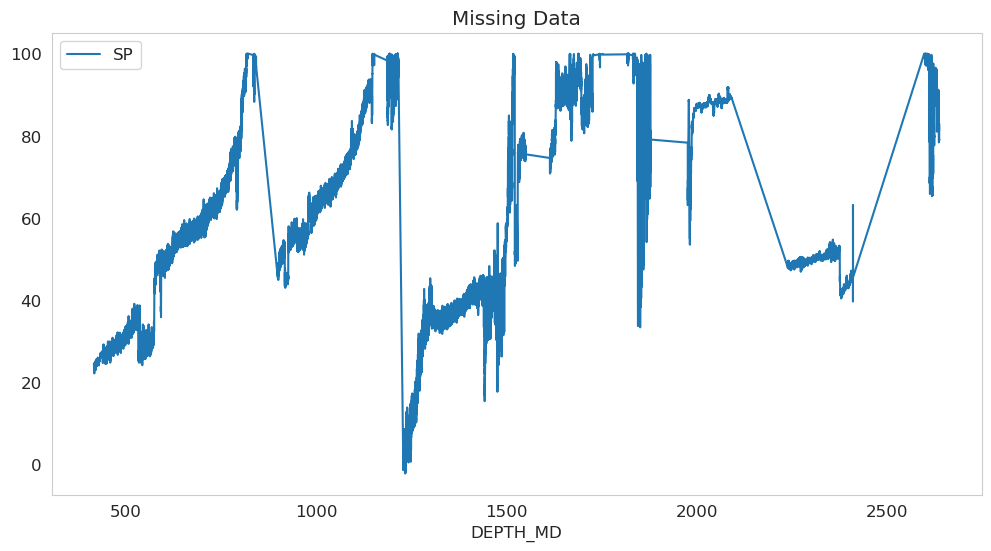

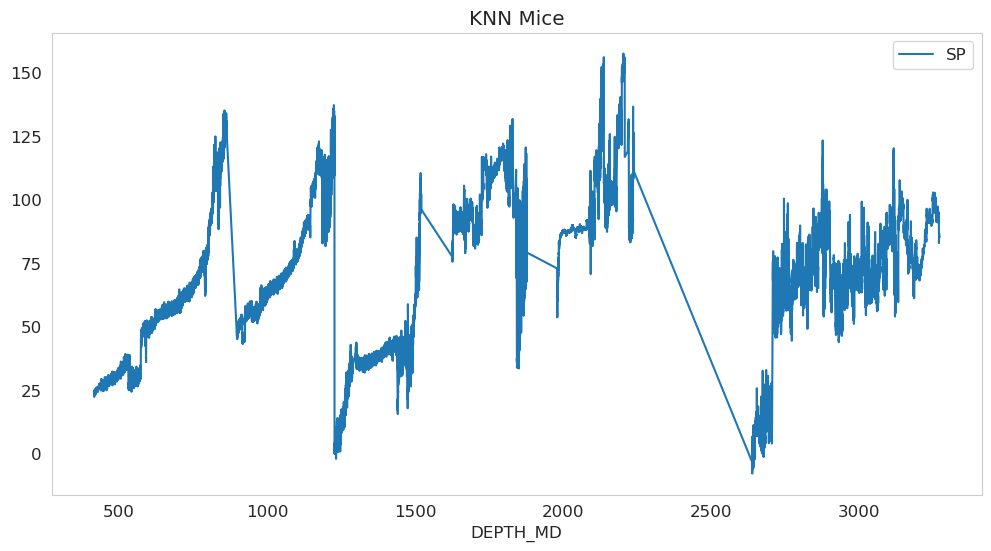

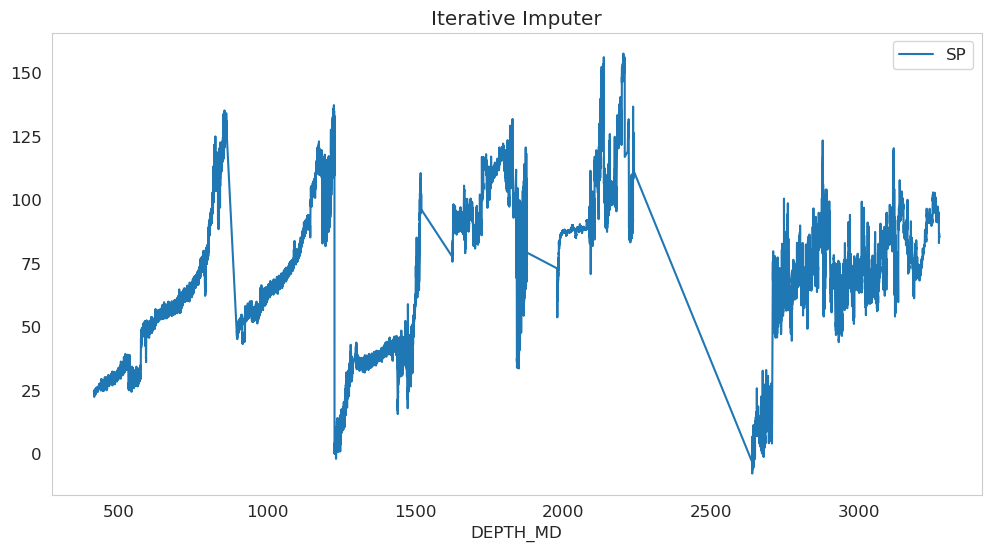

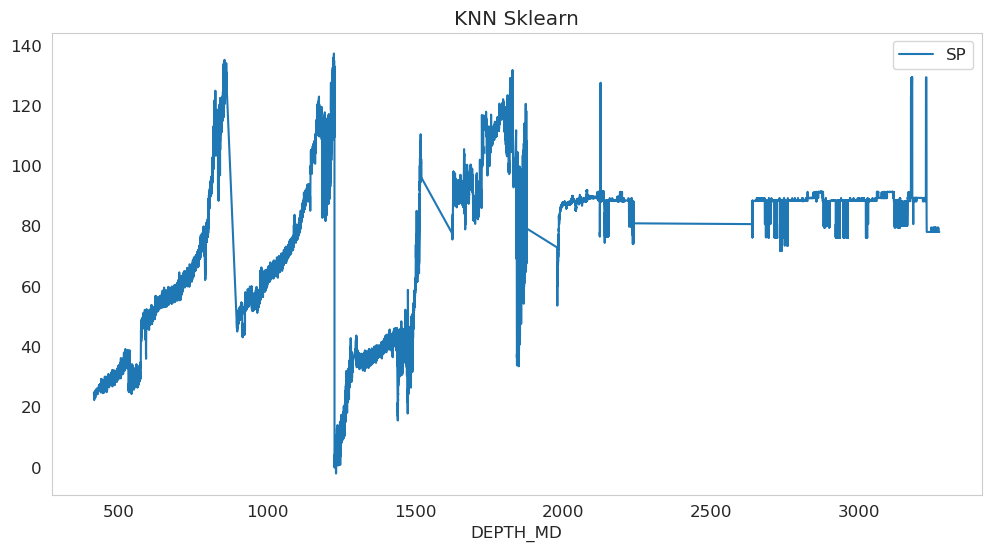

In [217]:
dff.plot(x = 'DEPTH_MD', y = 'SP', figsize=(12,6), title = "Missing Data")
df_knnmice.plot(x = 'DEPTH_MD', y = 'SP', figsize=(12,6), title = "KNN Mice" )
df_itskl.plot(x = 'DEPTH_MD', y = 'SP', figsize=(12,6), title = "Iterative Imputer")
df_knnskl.plot(x = 'DEPTH_MD', y = 'SP', figsize=(12,6), title = "KNN Sklearn")
plt.show()

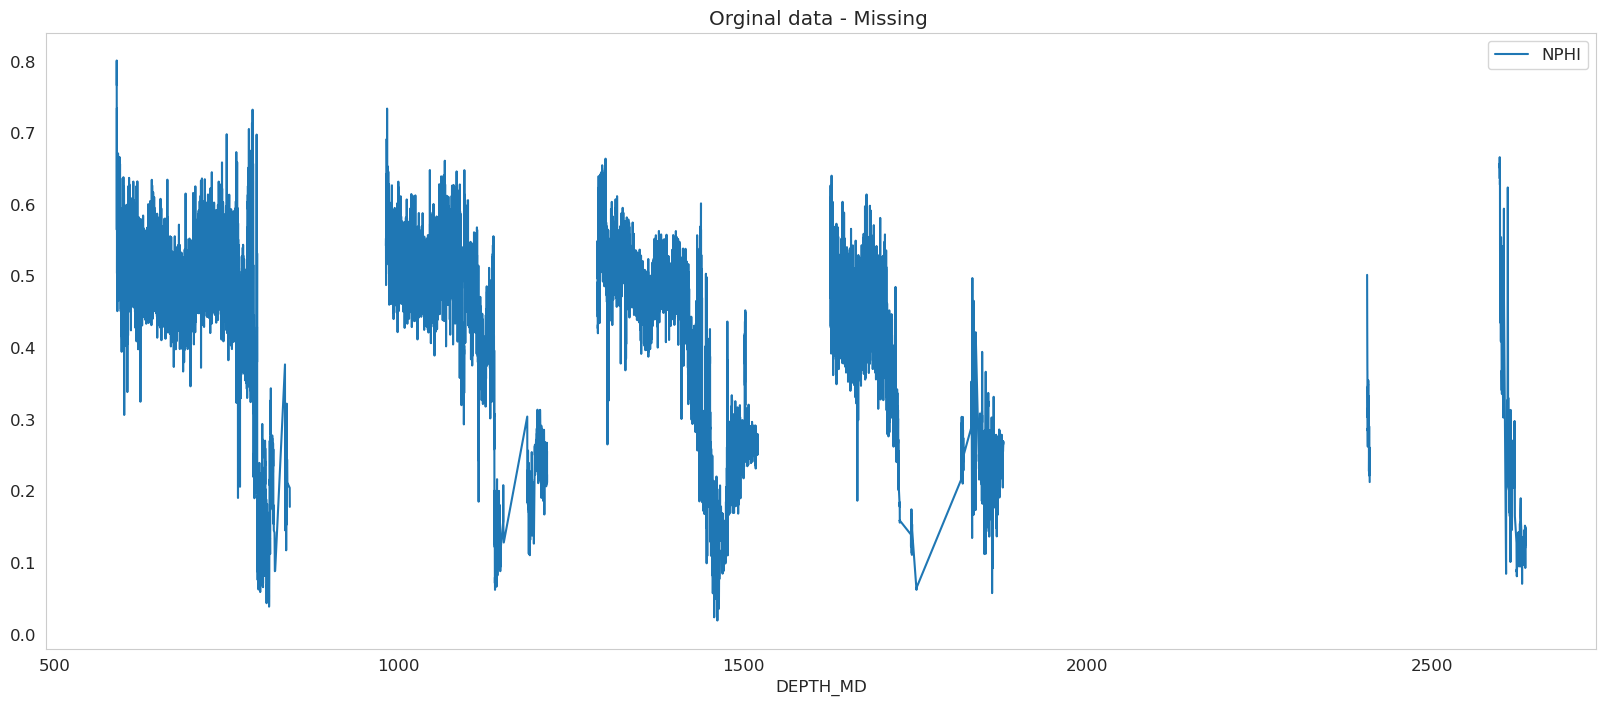

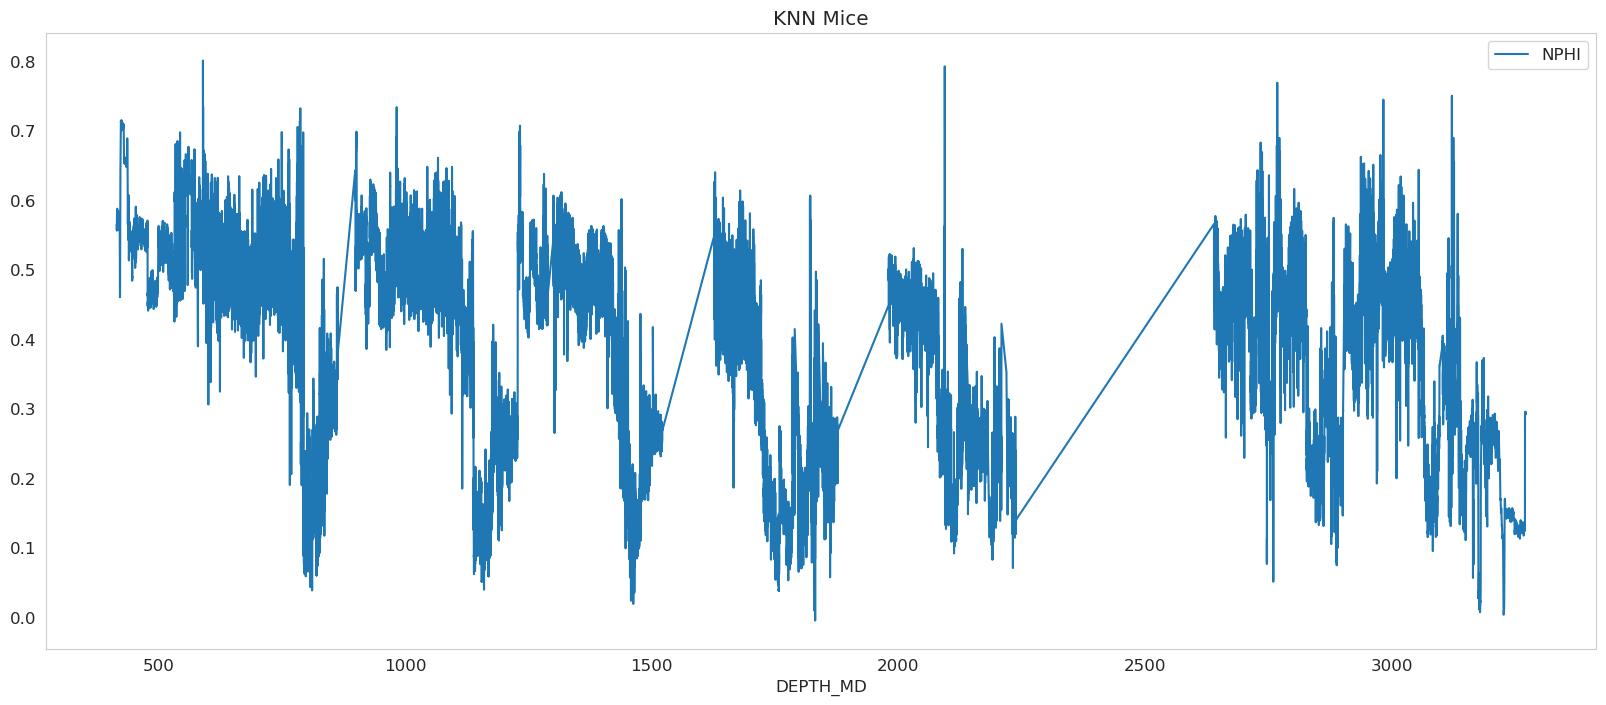

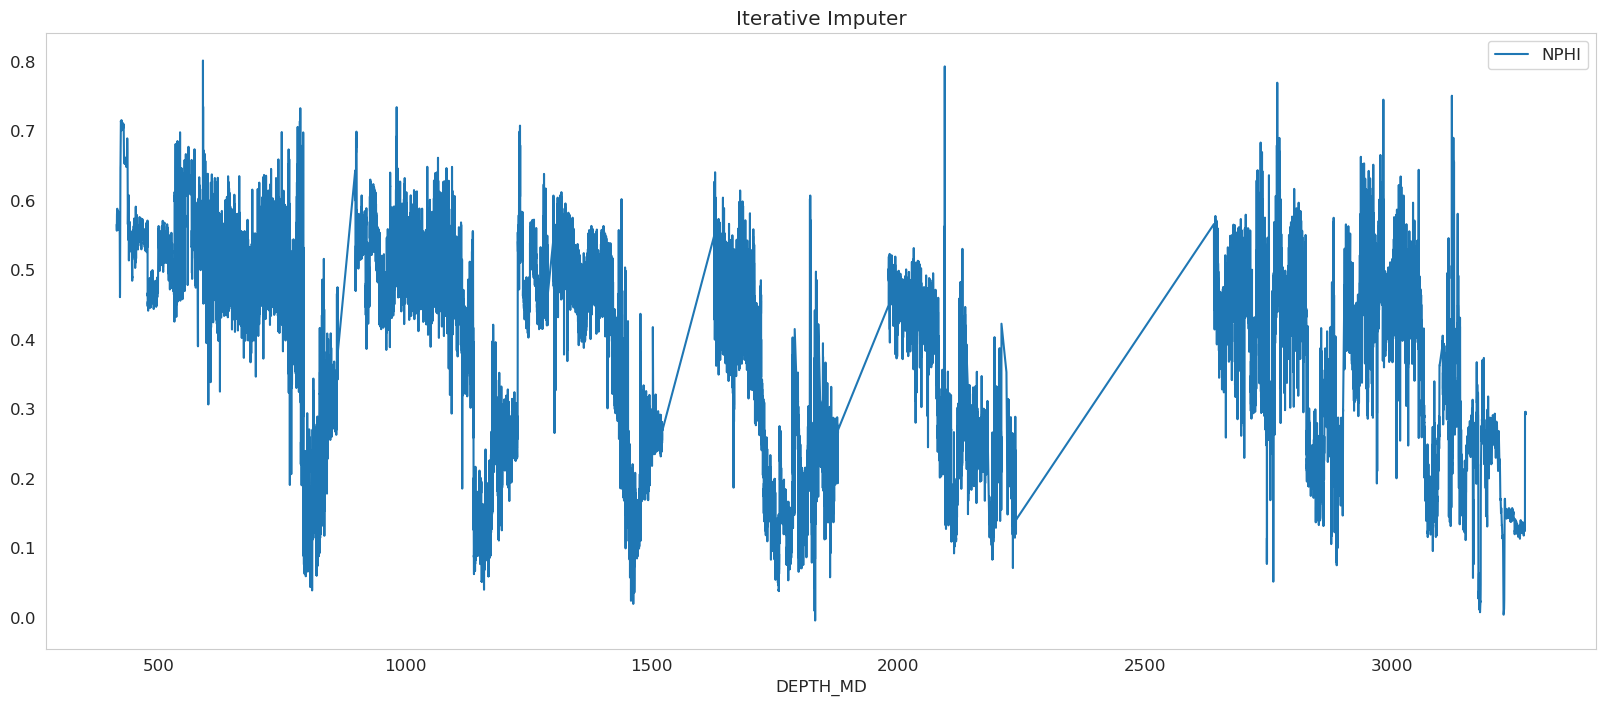

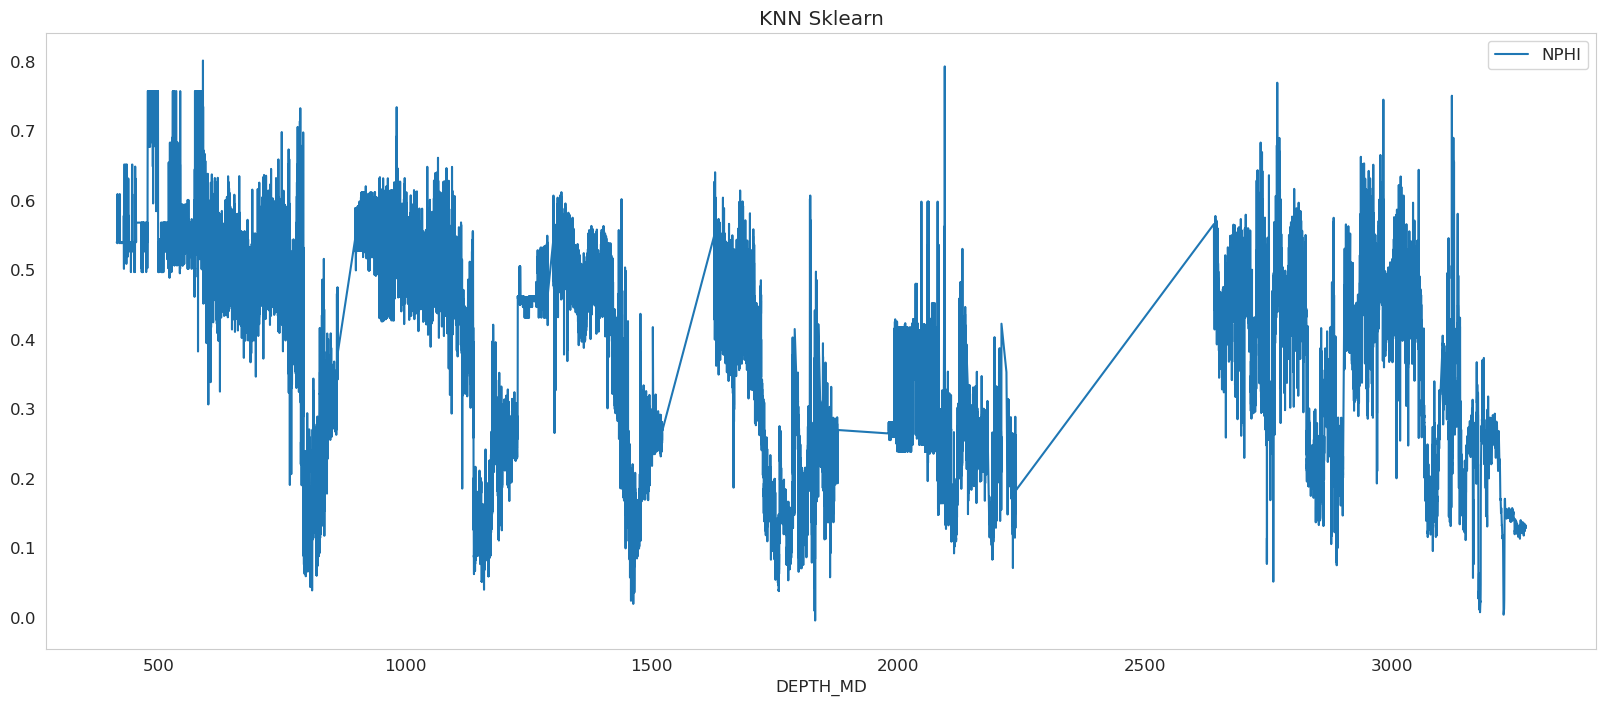

In [218]:
dff.plot(x = 'DEPTH_MD', y = 'NPHI', figsize=(20,8), title = "Orginal data - Missing ")
df_knnmice.plot(x = 'DEPTH_MD', y = 'NPHI', figsize=(20,8), title = "KNN Mice" )
df_itskl.plot(x = 'DEPTH_MD', y = 'NPHI', figsize=(20,8), title = "Iterative Imputer")
df_knnskl.plot(x = 'DEPTH_MD', y = 'NPHI', figsize=(20,8), title = "KNN Sklearn")
plt.show()

<Figure size 2000x3000 with 0 Axes>

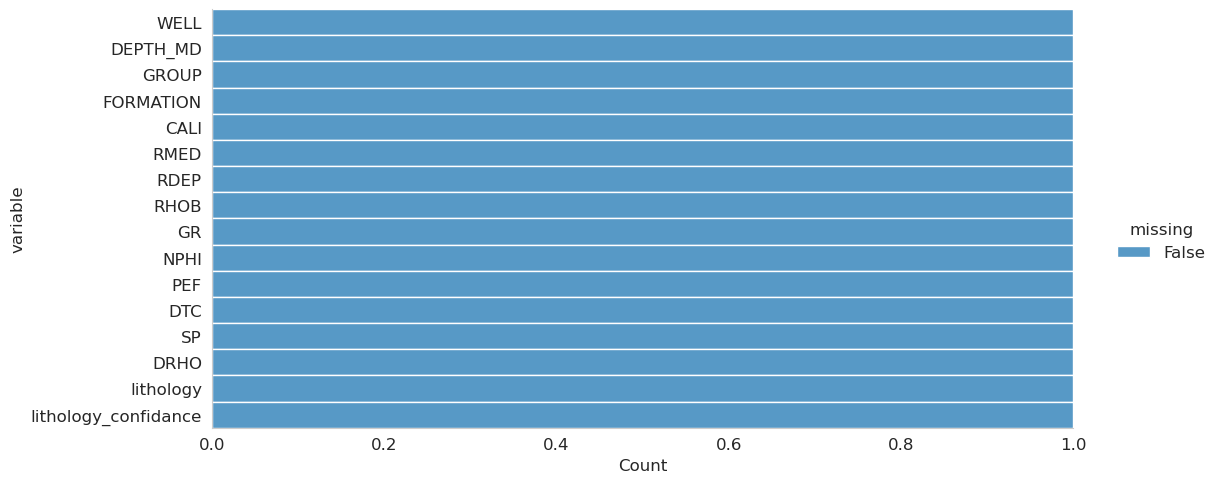

In [219]:
plt.figure(figsize=(20,30))
sns.displot(
    data=df_knnmice.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


 *Coping Data Frame*

In [220]:
df1=dff.copy(deep=True)
df2=dff.copy(deep=True)

df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 70530 entries, 0 to 108841
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WELL                  70530 non-null  int64  
 1   DEPTH_MD              70530 non-null  float64
 2   GROUP                 70530 non-null  int64  
 3   FORMATION             70530 non-null  int64  
 4   CALI                  70437 non-null  float64
 5   RMED                  70465 non-null  float64
 6   RDEP                  70516 non-null  float64
 7   RHOB                  59541 non-null  float64
 8   GR                    70530 non-null  float64
 9   NPHI                  42577 non-null  float64
 10  DTC                   70490 non-null  float64
 11  SP                    70530 non-null  float64
 12  DRHO                  59999 non-null  float64
 13  lithology             70530 non-null  int64  
 14  lithology_confidance  70523 non-null  float64
dtypes: float64(11), in

In [221]:
# مش هتشتفل عشان dff بقا لها range مختلف عن كل model او df من لي بقارنهم بيها 
"""plt.figure(figsize=(40, 15))

plt.plot(dff['DEPTH_MD'], df_knnmice['NPHI'], label = "KNN Mice", color ='blue', alpha = 0.2)
plt.plot(dff['DEPTH_MD'], df_itskl['NPHI'], label = "Iterative Imputer",color='cyan', alpha = 0.2)
plt.plot(dff['DEPTH_MD'], df_knnskl['NPHI'], label = "KNN Sklearn", color = 'red', alpha = 0.2)
plt.plot(dff['DEPTH_MD'], dff['NPHI'], label = "Data", color = "green", alpha = 0.2)
plt.plot(df1['DEPTH_MD'], df1['NPHI'], label = "Data", color = "black", alpha = 0.2)

plt.xlim(0, 3500)
plt.legend()
plt.title('NPHI')
plt.show()"""

'plt.figure(figsize=(40, 15))\n\nplt.plot(dff[\'DEPTH_MD\'], df_knnmice[\'NPHI\'], label = "KNN Mice", color =\'blue\', alpha = 0.2)\nplt.plot(dff[\'DEPTH_MD\'], df_itskl[\'NPHI\'], label = "Iterative Imputer",color=\'cyan\', alpha = 0.2)\nplt.plot(dff[\'DEPTH_MD\'], df_knnskl[\'NPHI\'], label = "KNN Sklearn", color = \'red\', alpha = 0.2)\nplt.plot(dff[\'DEPTH_MD\'], dff[\'NPHI\'], label = "Data", color = "green", alpha = 0.2)\nplt.plot(df1[\'DEPTH_MD\'], df1[\'NPHI\'], label = "Data", color = "black", alpha = 0.2)\n\nplt.xlim(0, 3500)\nplt.legend()\nplt.title(\'NPHI\')\nplt.show()'

In [222]:
"""a=dff.plot(x = 'DEPTH_MD', y = 'SP', figsize=(12,6), title = "Missing Data")
b=df_knnmice.plot(x = 'DEPTH_MD', y = 'SP', figsize=(12,6), title = "KNN Mice" )
c=df_itskl.plot(x = 'DEPTH_MD', y = 'SP', figsize=(12,6), title = "Iterative Imputer")
d=df_knnskl.plot(x = 'DEPTH_MD', y = 'SP', figsize=(12,6), title = "KNN Sklearn")"""



"""plt.figure(figsize=(40, 15))
plt.plot(dff['DEPTH_MD'], dff['SP'], label = "Data", color = "green", alpha = 1)
plt.plot(dff['DEPTH_MD'], df_knnmice['SP'], label = "KNN Mice", color ='blue', alpha = .6)
plt.plot(dff['DEPTH_MD'], df_itskl['SP'], label = "Iterative Imputer",color='cyan', alpha = .4)
plt.plot(dff['DEPTH_MD'], df_knnskl['SP'], label = "KNN Sklearn", color = 'red', alpha = 0.2)
plt.xlim(0, 3500)
plt.legend()
plt.title('SP')
plt.show()"""

'plt.figure(figsize=(40, 15))\nplt.plot(dff[\'DEPTH_MD\'], dff[\'SP\'], label = "Data", color = "green", alpha = 1)\nplt.plot(dff[\'DEPTH_MD\'], df_knnmice[\'SP\'], label = "KNN Mice", color =\'blue\', alpha = .6)\nplt.plot(dff[\'DEPTH_MD\'], df_itskl[\'SP\'], label = "Iterative Imputer",color=\'cyan\', alpha = .4)\nplt.plot(dff[\'DEPTH_MD\'], df_knnskl[\'SP\'], label = "KNN Sklearn", color = \'red\', alpha = 0.2)\nplt.xlim(0, 3500)\nplt.legend()\nplt.title(\'SP\')\nplt.show()'

## New soln for nan Values 

<AxesSubplot:>

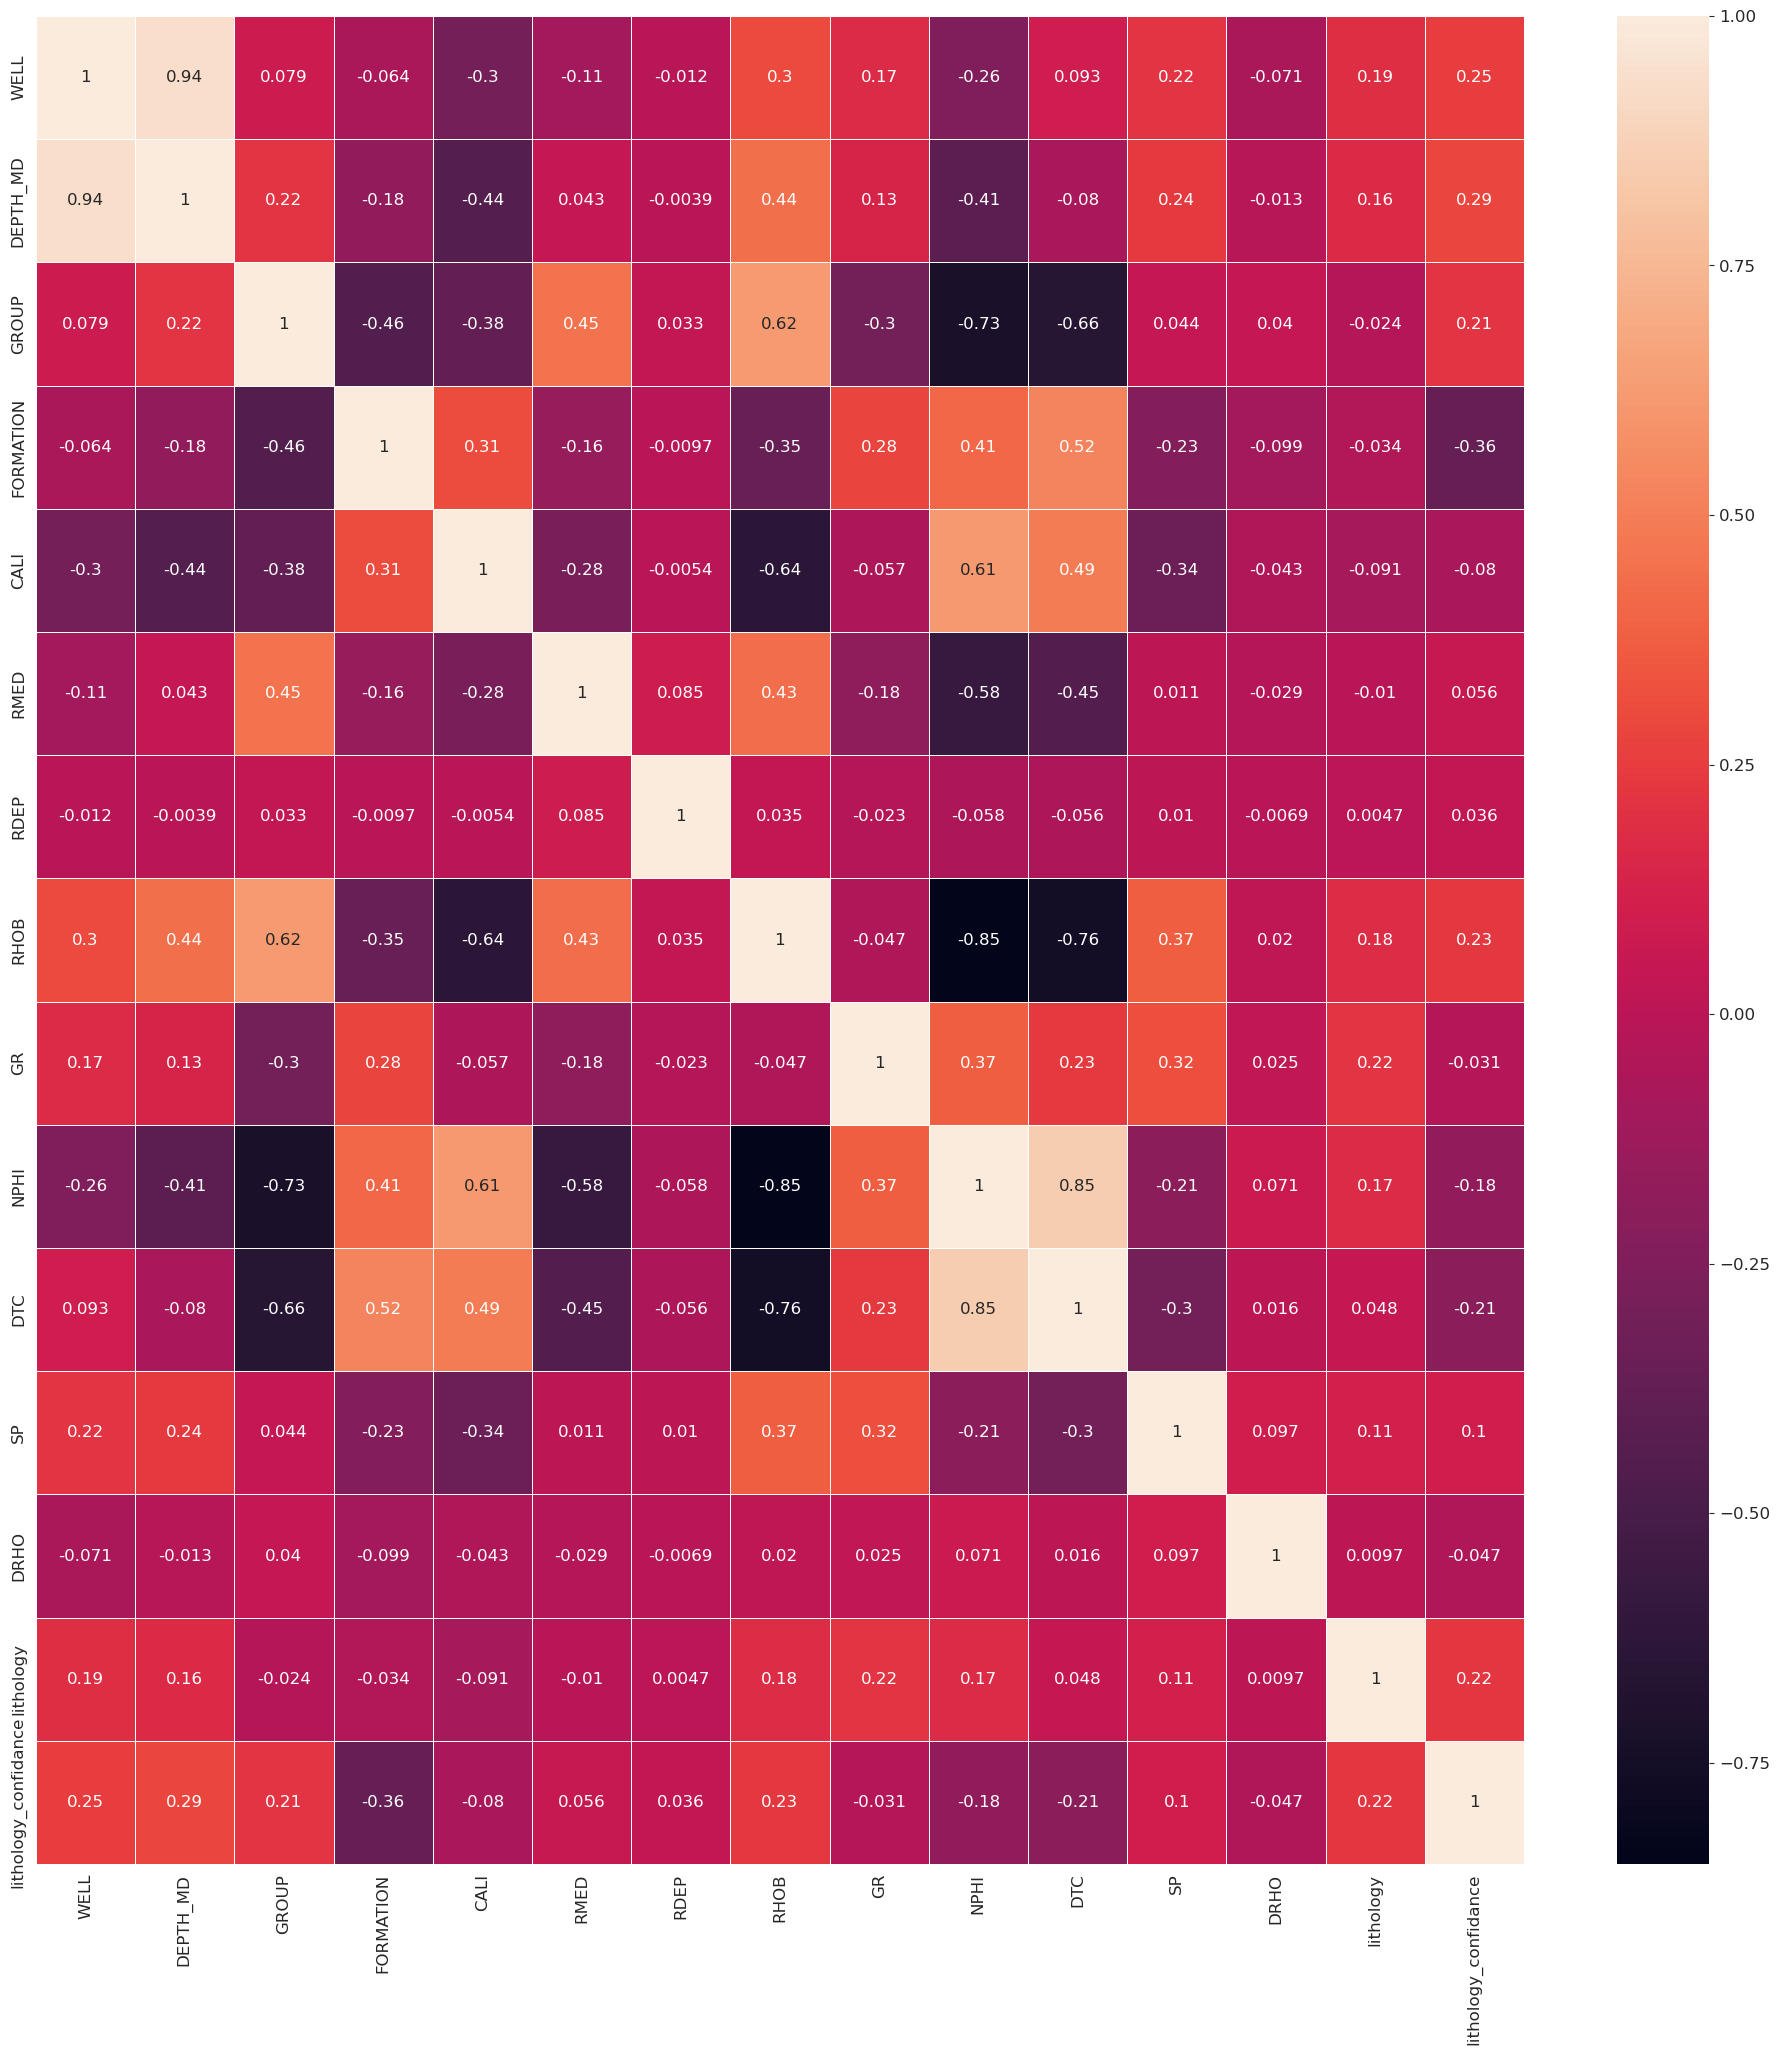

In [223]:
corr1=df1.corr()
plt.figure(figsize=(24,24))
#p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn')  
sns.heatmap(corr1, annot = True, linewidths=0.5)

In [224]:
df1[['SP', 'NPHI', 'GR', 'CALI', 'DRHO']].isna().sum()

SP          0
NPHI    27953
GR          0
CALI       93
DRHO    10531
dtype: int64

In [258]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
itr1=IterativeImputer(estimator=LinearRegression())
df1[['SP', 'NPHI', 'GR', 'CALI','RHOB' ,'DRHO']]=itr1.fit_transform(df1[['SP', 'NPHI', 'GR', 'CALI','RHOB', 'DRHO']])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [259]:
df1[['SP', 'NPHI', 'GR', 'CALI', 'DRHO']].isna().sum()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [260]:
plt.figure(figsize=(30, 15))
plt.plot(dff['DEPTH_MD'], df1['SP'], label = "SP Orginal Data", color = "green", alpha = 1)
plt.xlim(0, 3500)
plt.legend()
plt.title('SP')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 3000x1500 with 0 Axes>

In [143]:
itr2=IterativeImputer(estimator=RandomForestRegressor())

In [144]:
"""df2[['SP', 'NPHI', 'GR', 'CALI', 'DRHO']]=itr2.fit_transform(df2[['SP', 'NPHI', 'GR', 'CALI', 'DRHO']])"""

"df2[['SP', 'NPHI', 'GR', 'CALI', 'DRHO']]=itr2.fit_transform(df2[['SP', 'NPHI', 'GR', 'CALI', 'DRHO']])"

In [261]:
plt.figure(figsize=(20, 10))

plt.plot(df1['DEPTH_MD'], df1['NPHI'], label = "Iterative Data", color = "black", alpha = 1)
plt.plot(df1['DEPTH_MD'], dff['NPHI'], label = "Data Orginal Data", color = "blue", alpha = 1)

plt.xlim(0, 3500)
plt.legend()
plt.title('NPHI')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 2000x1000 with 0 Axes>

In [233]:
"""plt.figure(figsize=(15, 10))

plt.plot(df1['DEPTH_MD'], df1['SP'], label = "it", color = "green", alpha = 0.5)
plt.plot(dff['DEPTH_MD'], df_knnmice['SP'], label = "KNN Mice", color ='blue', alpha = 0.3)
plt.plot(dff['DEPTH_MD'], df_itskl['SP'], label = "Iterative Imputer",color='cyan', alpha = 0.3)
plt.plot(dff['DEPTH_MD'], df_knnskl['SP'], label = "KNN Sklearn", color = 'red', alpha = 0.3)
plt.plot(df1['DEPTH_MD'], dff['SP'], label = "Data", color = "grey", alpha = 1)

plt.xlim(0, 3500)
plt.legend()
plt.title('NPHI')
plt.show()"""

'plt.figure(figsize=(15, 10))\n\nplt.plot(df1[\'DEPTH_MD\'], df1[\'SP\'], label = "it", color = "green", alpha = 0.5)\nplt.plot(dff[\'DEPTH_MD\'], df_knnmice[\'SP\'], label = "KNN Mice", color =\'blue\', alpha = 0.3)\nplt.plot(dff[\'DEPTH_MD\'], df_itskl[\'SP\'], label = "Iterative Imputer",color=\'cyan\', alpha = 0.3)\nplt.plot(dff[\'DEPTH_MD\'], df_knnskl[\'SP\'], label = "KNN Sklearn", color = \'red\', alpha = 0.3)\nplt.plot(df1[\'DEPTH_MD\'], dff[\'SP\'], label = "Data", color = "grey", alpha = 1)\n\nplt.xlim(0, 3500)\nplt.legend()\nplt.title(\'NPHI\')\nplt.show()'

<Figure size 2000x3000 with 0 Axes>

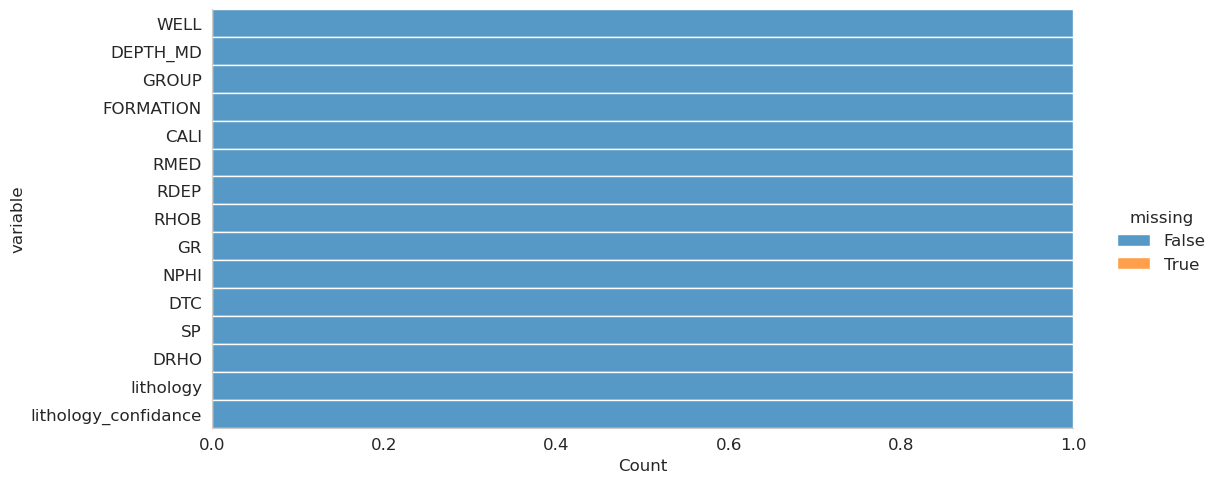

In [234]:
plt.figure(figsize=(20,30))
sns.displot(
    data=df1.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


# RandomForestClassifier - df1


In [235]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [236]:
df1.isna().sum()

WELL                     0
DEPTH_MD                 0
GROUP                    0
FORMATION                0
CALI                     0
RMED                    65
RDEP                    14
RHOB                     0
GR                       0
NPHI                     0
DTC                     40
SP                       0
DRHO                     0
lithology                0
lithology_confidance     7
dtype: int64

In [247]:
df1.shape

(70530, 15)

In [244]:


X = df1[['RDEP', 'RHOB', 'GR', 'NPHI',  'DTC','SP','DRHO','CALI','RMED']]
y = df1['lithology']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [248]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
df1 = my_imputer.fit_transform(df1)

In [249]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
accuracy

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [246]:
df1.isna().sum()

WELL                     0
DEPTH_MD                 0
GROUP                    0
FORMATION                0
CALI                     0
RMED                    65
RDEP                    14
RHOB                     0
GR                       0
NPHI                     0
DTC                     40
SP                       0
DRHO                     0
lithology                0
lithology_confidance     7
dtype: int64

In [243]:
CMX= classification_report(y_test, y_pred)
print(CMX)

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
matrix= plot_confusion_matrix(clf,X_test,y_test)
matrix.ax_.set_title('Confusion Matrix')
plt.rcParams.update({'font.size': 25})
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.gcf().set_size_inches(26,26)
plt.show()

## Lithology Key

The lithology key for the curve “FORCE_2020_LITHOFACIES_LITHOLOGY” is shown below:

30000: Sandstone

65030: Sandstone/Shale

65000: Shale

80000: Marl

74000: Dolomite

70000: Limestone

70032: Chalk

88000: Halite

86000: Anhydrite

99000: Tuff

90000: Coal

93000: Basement

### Feature Weights in Model 

In [ ]:
import eli5.sklearn
eli5.explain_weights(clf,feature_names=list(X_train.columns))

## Model Tuning 

In [ ]:
"""from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
"""

In [ ]:
"""cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)"""

In [ ]:
"model.fit(X_train,y_train)"
"model.export('model_best_model.py')"

In [ ]:
# get this result 
"""Generation 1 - Current best internal CV score: 0.932767630523204

Generation 2 - Current best internal CV score: 0.932767630523204

Generation 3 - Current best internal CV score: 0.932767630523204

Generation 4 - Current best internal CV score: 0.932767630523204

Generation 5 - Current best internal CV score: 0.932767630523204

Best pipeline: KNeighborsClassifier(MinMaxScaler(input_matrix), n_neighbors=7, p=1, weights=distance)
TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)"""

***result of the Tuning***

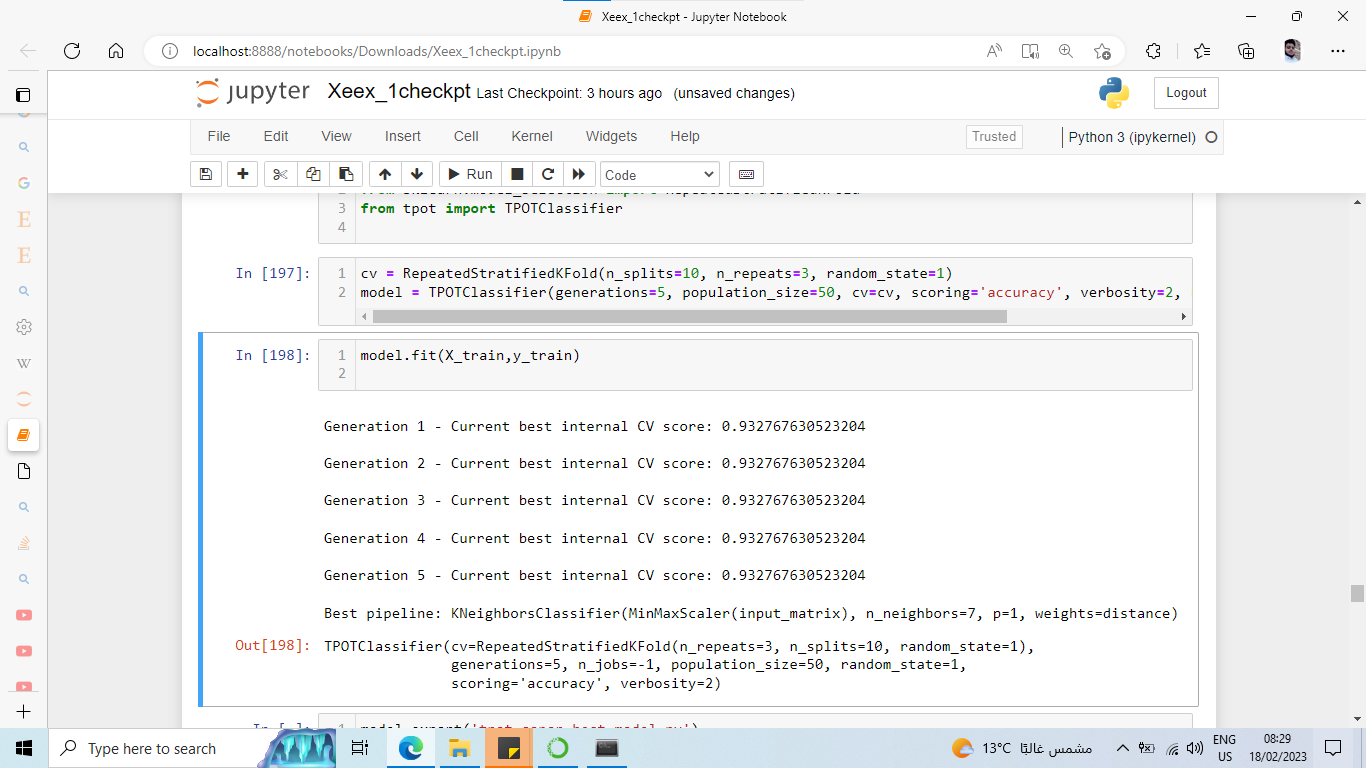

# RandomForestClassifier - df_knnmice

In [250]:
X = df_knnmice[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC','SP','DRHO','CALI','RMED']]
y = df_knnmice['lithology']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
clf_df_knnmice=RandomForestClassifier(n_estimators=100)
clf_df_knnmice.fit(X_train,y_train)
y_pred=clf_df_knnmice.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
accuracy

0.9425798625151638

In [251]:
CMX= classification_report(y_test, y_pred)
print(CMX)

              precision    recall  f1-score   support

     30000.0       0.94      0.94      0.94      4078
     65000.0       0.96      0.99      0.97     17930
     65030.0       0.84      0.72      0.77      1832
     70000.0       0.94      0.89      0.92      3447
     70032.0       0.93      0.87      0.90       756
     74000.0       0.71      0.61      0.65        28
     80000.0       0.91      0.89      0.90      1135
     86000.0       1.00      0.92      0.96        25
     88000.0       0.80      0.80      0.80         5
     90000.0       0.84      0.76      0.80        21
     99000.0       0.93      0.79      0.85       419

    accuracy                           0.94     29676
   macro avg       0.89      0.83      0.86     29676
weighted avg       0.94      0.94      0.94     29676



### Feature Weights in Model 

In [253]:
import eli5.sklearn
eli5.explain_weights(clf_df_knnmice,feature_names=list(X_train.columns))

Explanation(estimator='RandomForestClassifier()', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='GR', weight=0.25720029465739086, std=0.07349550568877922, value=None), FeatureWeight(feature='DTC', weight=0.12768820556477797, std=0.07021632577889093, value=None), FeatureWeight(feature='NPHI', weight=0.12762512476335638, std=0.07629194281050067, value=None), FeatureWeight(feature='CALI', weight=0.09628437290851061, std=0.018216407940582924, value=None), FeatureWeight(feature='SP', weight=0.08053161194374803, std=0.010748155470213076, value=None), FeatureWeight(feature='RHOB', weight=0.08013100359577885, std=0.0406229498024252, value=None), FeatureWeight(feature='RDEP', weight=0.07385754325977481, std=0.024108410990979802, value=None), FeatureWeight(feature='RMED', weight=0.06118221154242658, std=0.02651594630309512, value=None), FeatureWeight(feature='PEF', weight=0.055430550756978704, std=0.018335380667814014, value=None), FeatureWeight(feature='DRHO', weight=0.04006908100725745, std=0.005207950441756701, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

******

# RandomForestClassifier - df_knnskl


In [254]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf_df_knnskl=RandomForestClassifier(n_estimators=100)
clf_df_knnskl.fit(X_train,y_train)
y_pred=clf_df_knnskl.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
accuracy

0.945039762771263

In [255]:
CMX= classification_report(y_test, y_pred)
print(CMX)

              precision    recall  f1-score   support

     30000.0       0.93      0.95      0.94      4214
     65000.0       0.96      0.99      0.97     18009
     65030.0       0.86      0.71      0.78      1812
     70000.0       0.95      0.90      0.92      3353
     70032.0       0.91      0.91      0.91       725
     74000.0       0.77      0.74      0.75        31
     80000.0       0.92      0.90      0.91      1117
     86000.0       1.00      1.00      1.00        21
     88000.0       1.00      0.60      0.75         5
     90000.0       0.92      0.79      0.85        14
     99000.0       0.91      0.74      0.82       375

    accuracy                           0.95     29676
   macro avg       0.92      0.84      0.87     29676
weighted avg       0.94      0.95      0.94     29676



******

# RandomForestClassifier - df_itskl


In [256]:
X = df_itskl[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC','SP','DRHO','CALI','RMED']]
y = df_itskl['lithology']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf_df_itskl=RandomForestClassifier(n_estimators=100)
clf_df_itskl.fit(X_train,y_train)
y_pred=clf_df_itskl.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
accuracy

0.9445680010783124

In [257]:
CMX= classification_report(y_test, y_pred)
print(CMX)

              precision    recall  f1-score   support

     30000.0       0.94      0.95      0.94      4085
     65000.0       0.96      0.99      0.97     18121
     65030.0       0.85      0.71      0.78      1731
     70000.0       0.93      0.89      0.91      3426
     70032.0       0.89      0.89      0.89       740
     74000.0       0.83      0.60      0.70        25
     80000.0       0.94      0.88      0.91      1117
     86000.0       1.00      0.88      0.94        26
     88000.0       1.00      0.75      0.86         4
     90000.0       0.93      0.78      0.85        18
     99000.0       0.96      0.77      0.85       383

    accuracy                           0.94     29676
   macro avg       0.93      0.83      0.87     29676
weighted avg       0.94      0.94      0.94     29676



******

In [ ]:
### check over and under fitting and solutions
https://towardsdatascience.com/how-to-check-if-a-classification-model-is-overfitted-using-scikit-learn-148b6b19af8b

In [ ]:
### check confusion matrix 
https://medium.com/mlearning-ai/confusion-matrix-for-multiclass-classification-f25ed7173e66#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjU5NjJlN2EwNTljN2Y1YzBjMGQ1NmNiYWQ1MWZlNjRjZWVjYTY3YzYiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NzY2ODk4NTYsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwMjY4ODk2NjU0NjMwNjk3ODQzNyIsImVtYWlsIjoiZ2VvLmthcmVlbWlicmFoaW1AZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImF6cCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsIm5hbWUiOiJLYXJlZW0gSWJyYWhpbSIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BRWRGVHA1dW1mM3F6dVBtVUJkTlYxYjFTWHBscjh4akZaNXFqUmRDVjFnZ3NnPXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6IkthcmVlbSIsImZhbWlseV9uYW1lIjoiSWJyYWhpbSIsImlhdCI6MTY3NjY5MDE1NiwiZXhwIjoxNjc2NjkzNzU2LCJqdGkiOiI0OTY2N2I1MWZiMDI2NWJmZjU1OGU3YTQ2MzI3Njc4MzUxYmFmNjBiIn0.VXLNh7bZs2WOXvxZTQyIj0iK0VANG9B10nhbkRgeoGQmXvqAh8A-IFkAW_2ENkCJ_lDBiPP1byGHf_bo5DYUP9351v5y5kmJ9ObicmdKfq2GPLa8YH8n89G0DQSvobinVYPUwA3sGAvMU_m3-3FSuC4f_puJnr1Q6HySOJ28CVVcsuvDNVXvWkMh_ML3cMb29IJwfN3ZY7QefL5bpuM2wzuxyQryajWhyardbU-DtFck6T6o-EoMPjFnONEeIDfNAhk8aP_VvuiJ8Vsj0gVtn0YdiW-ppSeUg7U_JARVkeosHiqjyyObk4_Zf75JNPRKmZE9DDGO0zw7gcGaIyCERg

In [ ]:
dff.isna().sum()

In [ ]:
dff.describe().T

# ***Buliding Models on a data without Any Nan Value***

In [ ]:
# Data without Nan-values 
dfff=dff.dropna()
dfff.info()


In [ ]:

X = dfff[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC','SP','DRHO','CALI','RMED']]
y = dfff['lithology']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.metrics import confusion_matrix,f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score,log_loss

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
accuracy

In [ ]:
CMX= classification_report(y_test, y_pred)
print(CMX)

In [ ]:
dfff['lithology'].value_counts()

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

In [ ]:
#### Wrong need to reverse encoding for litho 
labels = df_lith['lith']

fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.0f',
                xticklabels=labels, 
                yticklabels = labels)

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



## Lithology Key

The lithology key for the curve “FORCE_2020_LITHOFACIES_LITHOLOGY” is shown below:

30000: Sandstone

65030: Sandstone/Shale

65000: Shale

80000: Marl

74000: Dolomite

70000: Limestone

70032: Chalk

88000: Halite

86000: Anhydrite

99000: Tuff

90000: Coal

93000: Basement

In [ ]:
"""data = alldata.loc[alldata['WELL'] == '16/10-1'][['DEPTH_MD', 'GR', 'RHOB', 'NPHI', 'FORCE_2020_LITHOFACIES_LITHOLOGY']]"""

In [ ]:
dfff['SP'].describe()

In [ ]:
def makeplot(well, top_depth, bottom_depth):
    fig, ax = plt.subplots(figsize=(30,15))

    #Set up the plot axes
    ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1, sharey = ax1)
    ax3 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
    ax4 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1, sharey = ax1)
    ax5 = ax1.twiny() #Sp the y-axis for the SP track with the Gamma track

    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
    ax10 = ax1.twiny()
    ax10.xaxis.set_visible(False)
    ax11 = ax2.twiny()
    ax11.xaxis.set_visible(False)
    ax13 = ax4.twiny()
    ax13.xaxis.set_visible(False)

    # Gamma Ray track
    ax1.plot(df1["GR"], df1['DEPTH_MD'], color = "green", linewidth = 0.5)
    ax1.set_xlabel("Gamma")
    ax1.xaxis.label.set_color("green")
    ax1.set_xlim(0, 150)
    ax1.set_ylabel("Depth (m)")
    ax1.tick_params(axis='x', colors="green")
    ax1.spines["top"].set_edgecolor("green")
    ax1.title.set_color('green')
    ax1.set_xticks([0, 50, 100, 150])

    # Density track
    ax2.plot(df1["RHOB"], df1['DEPTH_MD'], color = "red", linewidth = 0.5)
    ax2.set_xlabel("Density")
    ax2.set_xlim(1.95, 2.95)
    ax2.xaxis.label.set_color("red")
    ax2.tick_params(axis='x', colors="red")
    ax2.spines["top"].set_edgecolor("red")
    ax2.set_xticks([1.95, 2.45, 2.95])

    # Neutron track placed ontop of density track
    ax3.plot(df1["NPHI"], df1['DEPTH_MD'], color = "blue", linewidth = 0.5)
    ax3.set_xlabel('Neutron')
    ax3.xaxis.label.set_color("blue")
    ax3.set_xlim(0.45, -0.15)
    ax3.tick_params(axis='x', colors="blue")
    ax3.spines["top"].set_position(("axes", 1.08))
    ax3.spines["top"].set_visible(True)
    ax3.spines["top"].set_edgecolor("blue")
    ax3.set_xticks([0.45,  0.15, -0.15])
    
    ax5.plot(df1["SP"], df1['DEPTH_MD'], color = "yellow", linewidth = 0.5)
    ax5.set_xlabel('Spountinous Potentional')
    ax5.xaxis.label.set_color("yellow")
    ax5.set_xlim(0, 150)
    ax5.tick_params(axis='x', colors="yellow")
    ax5.spines["top"].set_position(("axes", 1.08))
    ax5.spines["top"].set_visible(True)
    ax5.spines["top"].set_edgecolor("yellow")
    ax5.set_xticks([ 150, 100, 50, 0])

    # Lithology track
    ax4.plot(df1["lithology"], df1['DEPTH_MD'], color = "black", linewidth = 0.5)
    ax4.set_xlabel("Lithology")
    ax4.set_xlim(0, 1)
    ax4.xaxis.label.set_color("black")
    ax4.tick_params(axis='x', colors="black")
    ax4.spines["top"].set_edgecolor("black")

    for key in lithology_numbers.keys():
        color = lithology_numbers[key]['color']
        hatch = lithology_numbers[key]['hatch']
        ax4.fill_betweenx(df1['DEPTH_MD'], 0, df1['lithology'], where=(df1['lithology']==key),
                         facecolor=color, hatch=hatch)
        

    ax4.set_xticks([0, 1])

    # Common functions for setting up the plot can be extracted into
    # a for loop. This saves repeating code.
    for ax in [ax1, ax2, ax4]:
        ax.set_ylim(bottom_depth, top_depth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))
        
        
    for ax in [ax2, ax3, ax4]:
        plt.setp(ax.get_yticklabels(), visible = False)
        
    plt.tight_layout()
    fig.subplots_adjust(wspace = 0.15)
    

In [ ]:
makeplot(df1, 1400, 1440)

In [ ]:
dfff['DEPTH_MD'].describe()

# DecisionTreeClassifier on - dfff

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
accuracy

# KNeighborsClassifier on - dfff

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
accuracy

# GaussianNB on - dfff

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
accuracy

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [ ]:
fig, axs=plt.subplots(6,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(df2.index,df2['SP'],label='SP')
axs[0].legend()
axs[1].plot(df2.index,df2['DTC'],label='DTC')
axs[1].legend()
axs[2].plot(df2.index,df2['NPHI'],label='NPHI')
axs[2].legend()
axs[3].plot(df2.index,df2['PEF'],label='PEF')
axs[3].legend()
axs[4].plot(df2.index,df2['GR'],label='GR')
axs[4].legend()
axs[5].plot(df2.index,df2['CALI'],label='CALI')
axs[5].legend()
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df2_no_nan=df2.dropna()
df2_no_nan.isna().sum()

In [ ]:
xTrain = df2_no_nan[['GR','DTC','NPHI','PEF','CALI']]
yTrain = df2_no_nan[['SP']].values.flatten()

In [ ]:
print(xTrain[:10])
print(yTrain[:10])

In [ ]:
scaler = StandardScaler().fit(xTrain.values)


In [ ]:
xTrainScaled = scaler.transform(xTrain.values)


In [ ]:
print(xTrainScaled[:10])


In [ ]:
print(xTrainScaled.mean(axis=0))
print(xTrainScaled.std(axis=0))

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=5000).fit(xTrainScaled, yTrain)


In [ ]:
xTest = df2[['GR','DTC','NPHI','PEF','CALI']].dropna()
xTestScaled = scaler.transform(xTest.values)

In [ ]:
print(xTest.describe())
print(xTestScaled[:10])

In [ ]:
yPredict = regr.predict(xTestScaled)
print(yPredict[:10])

In [ ]:
fig, ax=plt.subplots(figsize=(12,8),sharex=True,sharey=True)
ax.plot(df2.index,df2['SP'],label='SP')
ax.plot(xTest.index,yPredict,label='SPPredict')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df2.head()

In [ ]:
df2['SPcompleted']=0

In [ ]:
for index, row in df2.iterrows():
    if np.isnan(row['SP']) and ~np.isnan(row['GR']) and ~np.isnan(row['DTC']) and ~np.isnan(row['NPHI']) and ~np.isnan(row['PEF'])and ~np.isnan(row['NPHI']):
        rowScaled = scaler.transform([[row['GR'],row['DTC'],row['NPHI'],row['PEF'],row['NPHI']]])
        df2.loc[index,['SPPredict']] = regr.predict(rowScaled)
    elif ~np.isnan(row['SP']):
        df2.loc[index,['SPPredict']] = row['SP']
    else:
        row['SPcompleted'] = np.nan

In [ ]:
fig, axs=plt.subplots(6,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(df2.index,df2['SPPredict'],label='SP')
axs[0].legend()
axs[1].plot(df2.index,df2['SP'],label='SP')
axs[1].legend()
axs[2].plot(df2.index,df2['DTC'],label='DTC')
axs[2].legend()
axs[3].plot(df2.index,df2['NPHI'],label='NPHI')
axs[3].legend()
axs[4].plot(df2.index,df2['PEF'],label='PEF')
axs[4].legend()
axs[5].plot(df2.index,df2['GR'],label='GR')
axs[5].legend()
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df2.columns

# Xgboot 

In [ ]:
X = df1[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC','SP','DRHO','CALI','RMED']]
y = df1['lithology']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['lithology']=le.fit_transform(df1['lithology'])

In [ ]:
from xgboost import XGBClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3,
                    objective = 'softprob',booster = "gbtree", random_state=0,
                   subsample= 0.9 , colsample_bytree=0.9, tree_method = "gpu_hist",
                    eval_metric="mlogloss",reg_lambda=1500, n_jobs=-1)
        


In [ ]:
df1['lithology']

In [ ]:
xgb.fit(X_train, y_train)


# using Gridsearch and CV and Paramters 

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb.fit(X_train, y_train)


In [ ]:
y_pred = xgb.predict(X_test)


In [ ]:
accuracyxgb=metrics.accuracy_score(y_test, y_pred)

In [ ]:
accuracyxgb

In [ ]:
XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
param_grid

In [ ]:
"""clf = RandomForestClassifier()
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 3, n_jobs=-1,verbose=1)
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))"""